In [1]:
import dill
dill.load_session('notebook_env.db')
import seaborn as sns; sns.set(color_codes=True)

AttributeError: Can't get attribute 'FrozenNDArray' on <module 'pandas.core.indexes.frozen' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\pandas\\core\\indexes\\frozen.py'>

### 1. Setting Up

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [ ]:
df = pd.read_csv('cardiac_complete_v1.csv')

In [ ]:
labels = df.columns.values

### 2. Separate Variables

#### Take in a set of labels, and return five lists: (1) Demographic Variables, (2) Lab Measurement Variables, (3) Interventions - Procedures, (4) Interventions - Drug, (5) Target.

In [ ]:
def get_features(labels,check=False):
    labels_dem = []; labels_lab = []; labels_proc = []; 
    labels_drug = []; labels_tar = [];
    if 'expire_flag' in labels:
        labels_tar.append('expire_flag')
    if 'age' in labels:
        labels_dem.append('age')
        if 'gender' in labels:
            labels_dem.append('gender')
    # Edit this section according to the dataset
    labels_lab = labels[5:74]
    labels_proc = labels[74:88]
    labels_drug = labels[88:]
    
    labels_dem = np.array(labels_dem,dtype=object)
    labels_tar = np.array(labels_tar,dtype=object)
    
    check_features(labels_dem,'Demographic',check)
    check_features(labels_lab,'Laboratory Tests',check)
    check_features(labels_proc,'Procedures',check)
    check_features(labels_drug,'Drug Interventions',check)
    check_features(labels_tar,'Target Value',check)
    
    return labels_dem,labels_lab,labels_proc,labels_drug,labels_tar

def check_features(labels,type,check=False):
    print('Total ' + type + ' Features: ' + str(len(labels)) )
    if check:
        print(*labels, sep = ", ")  

In [ ]:
labels_dem,labels_lab,labels_proc,labels_drug,labels_tar = get_features(labels,False)

### 3. Clean Data

In [ ]:
def clean_dataframe(data):
    data = data.copy()
    labels_df = data.columns.values
    
    # Cleaning
    data = data.replace(['>20.2'], 20.3).replace(['GREATER THAN 10'], 10.1).replace(['>150'], 151).replace(['>1000'], 1001)
    data = data.replace('0-2',1).replace(['<1','<1.0'],0).replace('3-May',4).replace('6-Oct',8).replace('Nov-20',15).replace('21-50',35).replace('>50',51)
    data = data.replace(['.',' ', 'NotDone','NOTDONE'],np.nan)
    data = data.replace('>80',81).replace('>300',301).replace('>500',501).replace('<35',34).replace('<1 /HPF',0).replace('>8',9)
    
    data['gender'] = data['gender'].replace('M',0).replace('F',1)
    data = data.replace(['NEGATIVE NO EOS SEEN', 'POSITIVE RARE EOS'],0)
    data = data.replace('ERROR PREVIOUSLY REPORTED AS 9.4',9.4).replace('ERROR PREVIOUSLY REPORTED AS 32.6',32.6).replace('GREATER THAN 30',30).replace('ERROR PREVIOUSLY REPORTED AS 100',100).replace('150 IS HIGHEST MEASURED PTT',150).replace('ERROR PREVIOUSLY REPORTED AS 313',313).replace('ERROR PREVIOUSLY REPORTED AS 14.8',14.8).replace('ERROR PREVIOUSLY REPORTED AS 2.90',2.90).replace('ERROR PREVIOUSLY REPORTED AS 10.1',10.1)
    data = data.replace('100-250',175).replace('1-2',1.5).replace('2-4',3).replace('25-100',62.5).replace('25-50',37.5).replace('100-200',150).replace('50-200',125).replace('100-500',300).replace('75-100',87.5).replace('12.5-25',18).replace('50-100',75).replace('100-400',250)
    data = data.replace('1000-2000',1500).replace('2200-4300',3250).replace('1500-2900',2200).replace('1500-3000',2250).replace('400-900',650).replace('1400-2800',2100).replace('1700-3500',2600).replace('1900-3800',2850)

    data['Specific Gravity'] = data['Specific Gravity'].replace('<1.005',0).replace('<=1.005',2).replace('>=1.030',3).replace('>1.030',4).replace('>=1.035',5).replace('>1.035',6).replace('>1.050',7).replace('>1.080',8)
    data['Acetaminophen'] = data['Acetaminophen'].replace('325-650', 500).replace('500-1000',750)
    data = data.replace('15-30',22.5).replace('30-60',45).replace('30-45',37.5)
    data = data.replace('0.5-2',1.25).replace('0.5-1',0.75).replace('1-5',3).replace('2-8',5).replace('0.25-2',1.125).replace('0.25-0.5',0.375)
    data = data.replace('2-4',3).replace('1-2',1.5).replace('2-6',4).replace('0.5-4',2.25).replace('2-5',3.5).replace('1-4',2.5)
    data = data.replace('0.5-4.0',2.25).replace('1-8',4.5)
    data = data.replace('200-400',300).replace('400-600',500).replace('15-30',22.5).replace('20-40',30).replace('40-60',50).replace('4-8',6)
    data = data.replace('1-6',3.5).replace('2-10',6).replace('1-3',2).replace('1-10',5.5).replace('4-6',5)
    
    data['Potassium Chloride'][data['Potassium Chloride'] == 9 ] = 10
    data['Potassium Chloride'][data['Potassium Chloride'] == 2.5 ] = 0
    data['Potassium Chloride'][data['Potassium Chloride'] == 12 ] = 10

    # New additions
    data['Bacteria'] = data['Bacteria'].replace(['NONE','O'],0).replace('RARE',1).replace('OCC',3).replace('FEW',2).replace('MOD',4).replace('MANY',5)
    data['Bilirubin'] = data['Bilirubin'].replace('SM',0).replace('MOD',1).replace('LG',2)
    data['Blood'] = data['Blood'].replace('SM',0).replace('MOD',1).replace(['LGE','LG'],2)
    data['Creatine Kinase, MB Isoenzyme'] = data['Creatine Kinase, MB Isoenzyme'].replace('GREATER THAN 500',501)
    data['Eosinophils'] = data['Eosinophils'].replace(['POSITIVE MODERATE EOS'],0)
    data['Intubated'] = data['Intubated'].replace('INTUBATED',1).replace('NOT INTUBATED',0)
    data['Leukocytes'] = data['Leukocytes'].replace('SM',0).replace('MOD',1).replace('LG',2)
    data['Nitrite'] = data['Nitrite'].replace('POS',1)
    data['SPECIMEN TYPE'] = data['SPECIMEN TYPE'].replace('ART',0).replace('VEN',1).replace('MIX',2).replace('CENTRAL VENOUS',3)
    data['Troponin T'] = data['Troponin T'].replace(['LESS THAN 0.01','<0.01'],0.01).replace('<0.02',0.02).replace('<0.10',0.10)
    data['Ventilator'] = data['Ventilator'].replace('CONTROLLED',1).replace('SPONTANEOUS',3).replace('IMV',2)
    data['Yeast'] = data['Yeast'].replace('NONE',0).replace('FEW',2).replace('RARE',1).replace('OCC',3).replace('MOD',4).replace('MANY',5)
    data = data.replace(['1-Feb', '2-Apr'],0.5)
    data['Insulin'] = data['Insulin'].replace('Feb-16',0.125).replace(['16; give 1/2 dose when NPO'],16)
    data['Meperidine'] = data['Meperidine'].replace('112.5-25',18).replace('25-30',27.5)
    data['Metoprolol'] = data['Metoprolol'].replace(['Oct-20', '5-Oct'],0.5).replace('May-20',0.25)
    data['Nitroglycerin'] = data['Nitroglycerin'].replace('0.25-0.6',0.5).replace('20-200',100).replace('0-10',5)
    data['Ondansetron'] = data['Ondansetron'].replace('4-Aug',0.5).replace('2-Aug',0.25)
    data['Urine Appearance'] = data['Urine Appearance'].replace(['Clear', 'CLEAR'],0).replace(['CLO','Cloudy','CLOUDY'],1).replace(['SlCloudy','SlCldy'],2).replace(['HAZY','Hazy'],3).replace(['SlHazy','SLHAZY'],4).replace('TURBID',5).replace('CLO',2)
    data['Urine Color'] = data['Urine Color'].replace(['Yellow', 'YELLOW'],1).replace(['Amber','LtAmb','DkAmb','AMBER','AMB','DKAMBE','DKAMBER'],2).replace(['PINK', 'Red','RED',],3).replace(['Straw','STRAW','Other', 'None'],0).replace(['Orange','ORANGE'],4).replace(['Brown','B'],6).replace('Green',5)
    
    data = data.replace(['ERROR', 'COMPUTER NETWORK FAILURE. TEST NOT RESULTED.','NEG','nan','CHRISTA1','TR'], np.nan)

    check_unclean(data)
    
    data_cleaned = data.astype(float)
    return data_cleaned

#### Function checks if the dataset is cleaned - contains only numerical values.
Input: Dataframe; Output: Features which have non-numerical values

In [ ]:
def check_unclean(data):
    ## PRINT THE VALUES WHICH ARE NOT YET FILLED
    labels = data.columns.values
    for j in labels:
        non_numeric = []
        for i in range(data.shape[0]):
            x = data[j].iloc[i]
            try: 
                float(x)
            except:
                if x not in non_numeric:
                    non_numeric.append(x)
        if len(non_numeric)>0:
            print(j, non_numeric)

In [ ]:
data = clean_dataframe(df)

### 4. Segregate Features

#### Choose which set of features to be used

In [ ]:
# Selecting only Demographic + Lab Test Features
features_lab_raw = np.concatenate((labels_dem,labels_lab))
# Selecting Demographic + Lab Test + Interventional Features
# features_int_raw = np.concatenate((labels_dem,labels_lab,labels_proc,labels_drug))
labels_tar

In [ ]:
# Select the features which are being used
X_raw = data[features_lab_raw]
Y = data[labels_tar]

In [41]:
missing_percentage = (X_raw.isna().sum(axis=0)/(X_raw.shape[0]/100)).values
features_lab = features_lab_raw.copy().tolist()
for i in range(len(missing_percentage)):
    if missing_percentage[i] > 50:
        print(features_lab_raw[i], missing_percentage[i])
        features_lab.remove(features_lab_raw[i])

Alanine Aminotransferase (ALT) 53.81313131313131
Albumin 60.656565656565654
Alkaline Phosphatase 54.7979797979798
Asparate Aminotransferase (AST) 53.81313131313131
Bacteria 71.76767676767676
Basophils 71.91919191919192
Bilirubin 97.42424242424242
Bilirubin, Total 54.368686868686865
Blood 82.65151515151514
Chloride, Whole Blood 65.9090909090909
Creatine Kinase (CK) 53.58585858585858
Creatine Kinase, MB Isoenzyme 70.85858585858585
Eosinophils 71.06060606060606
Epithelial Cells 66.43939393939394
Fibrinogen, Functional 68.7121212121212
Intubated 52.12121212121212
Ketone 95.95959595959596
Lactate 52.2979797979798
Lactate Dehydrogenase (LD) 67.92929292929293
Leukocytes 95.12626262626263
Lymphocytes 71.01010101010101
Monocytes 71.43939393939394
Neutrophils 71.91919191919192
Nitrite 98.61111111111111
Oxygen 70.93434343434343
Protein 88.2070707070707
RBC 65.63131313131314
Troponin T 69.69696969696969
Urine Appearance 56.48989898989899
Urine Color 56.36363636363636
Urobilinogen 88.05555555555556

#### Select features - (A) only demographic and lab test features or (B) demographic, lab test, procedures and drug features

In [ ]:
## Select feature list
option_features = 'intervention'
features_chosen = features_lab
# Select either (A) only lab test + demographic variables, or (B) lab test + interventional features
if option_features is 'intervention':
    features_chosen = np.concatenate((features_lab,labels_proc,labels_drug))
X = data[features_chosen]
if option_features is 'intervention':
#    X[labels_proc] = X[labels_proc].applymap(lambda x: 0 if np.isnan(x) else x)   
#    X[labels_drug] = X[labels_drug].applymap(lambda x: 0 if np.isnan(x) else 1) 
    X[labels_proc] = X[labels_proc].applymap(lambda x: 0 if np.isnan(x) else x)   
    X[labels_drug] = X[labels_drug].applymap(lambda x: 0 if np.isnan(x) else 1) 

### 5. Get information about the dataset

#### A) Develop the mean and standard deviations

In [ ]:
import statistics
from statistics import stdev
def checkbinary(row):
    return np.array_equal(row.dropna(), row.dropna().astype(bool))
def get_distribution(X,Y):
    df_dist = pd.DataFrame(np.zeros((16,X.shape[1])),columns=X.columns.values)
    mean_all = X.apply(np.nanmean, axis=0)
    std_all = X.apply(np.nanstd,axis=0)
    df_dist.iloc[0,:] = np.nanpercentile(X,2.275,axis=0)
    df_dist.iloc[1,:] = np.nanpercentile(X,15.865,axis=0)
    df_dist.iloc[2,:] = np.nanpercentile(X,50.000,axis=0)
    df_dist.iloc[3,:] = np.nanpercentile(X,84.135,axis=0)
    df_dist.iloc[4,:] = np.nanpercentile(X,97.725,axis=0)
    df_dist.iloc[5,:] = np.nanpercentile(X.loc[Y['expire_flag']==0],2.275,axis=0)
    df_dist.iloc[6,:] = np.nanpercentile(X.loc[Y['expire_flag']==0],15.865,axis=0)
    df_dist.iloc[7,:] = np.nanpercentile(X.loc[Y['expire_flag']==0],50.000,axis=0)
    df_dist.iloc[8,:] = np.nanpercentile(X.loc[Y['expire_flag']==0],84.135,axis=0)
    df_dist.iloc[9,:] = np.nanpercentile(X.loc[Y['expire_flag']==0],97.725,axis=0)
    df_dist.iloc[10,:] = np.nanpercentile(X.loc[Y['expire_flag']==1],2.275,axis=0)
    df_dist.iloc[11,:] = np.nanpercentile(X.loc[Y['expire_flag']==1],15.865,axis=0)
    df_dist.iloc[12,:] = np.nanpercentile(X.loc[Y['expire_flag']==1],50.000,axis=0)
    df_dist.iloc[13,:] = np.nanpercentile(X.loc[Y['expire_flag']==1],84.135,axis=0)
    df_dist.iloc[14,:] = np.nanpercentile(X.loc[Y['expire_flag']==1],97.725,axis=0)
    df_dist.iloc[15,:] = X.apply(checkbinary, axis=0)
    return df_dist

In [ ]:
data_percentiles = get_distribution(X,Y)

In [42]:
data_percentiles

,age,gender,Anion Gap,Base Excess,Bicarbonate,"Calcium, Total",Calculated Total CO2,Chloride,Creatinine,Free Calcium,...,Pantoprazole Sodium,Pneumococcal Vac Polyvalent,Potassium Chloride,Ranitidine,Simvastatin,Sodium Bicarbonate,Sucralfate,Vancomycin,Vancomycin HCl,Warfarin
0,38,0,8,-8,17,7.1,17,93,0.5,0.97,...,0,0,0,0,0,0,0,0,0,0
1,54,0,10,-2,22,7.9,23,100,0.7,1.08,...,0,0,0,0,0,0,0,0,0,0
2,68,0,13,0,25,8.6,26,105,1,1.15,...,0,0,1,0,0,0,0,0,0,0
3,81,1,16,3,29,9.3,29,110,1.6,1.23,...,0,1,1,1,1,0,1,1,1,1
4,89,1,21,7,33,10,34,115,4.9,1.35,...,1,1,1,1,1,1,1,1,1,1
5,38,0,8,-6,18,7.3,19,95,0.5,0.98,...,0,0,0,0,0,0,0,0,0,0
6,53,0,10,-1,22,7.9,24,101,0.7,1.08,...,0,0,0,0,0,0,0,0,0,0
7,66,0,13,0,25,8.6,26,105,0.9,1.16,...,0,0,1,1,0,0,0,0,0,0
8,77,1,15,3,28,9.3,29,111,1.3,1.23,...,0,1,1,1,1,0,1,1,1,1
9,87,1,19,6,32,9.9,32,115,3.6,1.35,...,1,1,1,1,1,1,1,1,1,1


#### A) Visualise the features for each class

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_distribution(feature,X,Y,bins=30):
    X_0 = (X[Y['expire_flag']==0][feature])
    X_1 = (X[Y['expire_flag']==1][feature])
    
    plt.hist([X_0, X_1], bins, density=False)
    plt.legend(['Class 0','Class 1'])
    plt.xlabel('Distribution of ' + feature + ' for both classes')
    plt.ylabel('Number of Patients')
    plt.title('Histogram displaying the distriubtion of ' + feature + ' for both Classes')
    plt.show()

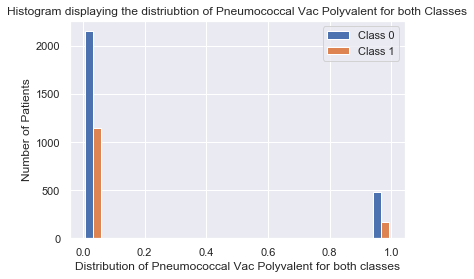

In [43]:
plot_distribution(features_chosen[80],X,Y,bins=15)

#### B) Correlation between features and target class

#### Firstly, measure the correlation between each feature and the target class

In [ ]:
from scipy import stats
def return_correlation(feature,X,Y, corr='p'):
    stats.pearsonr(X[feature],Y['expire_flag'])
    if corr is 's':
        print('S')
        return tuple(stats.spearmanr(X['age'],Y['expire_flag'],nan_policy='omit'))
    elif corr is 'k':
        print('K')
        return tuple(scipy.stats.kendalltau(X['age'],Y['expire_flag']))
    else:
        nan_flag = np.isnan(X[feature])
        return stats.pearsonr(X[feature][~nan_flag],Y['expire_flag'][~nan_flag])

In [44]:
stats_corr = np.zeros(len(features_chosen),)
for i in range(len(features_chosen)):
    stats_corr[i] = return_correlation(features_chosen[i],X,Y)[0]
for i in np.argsort(np.abs(stats_corr))[::-1]:
    print(features_chosen[i] + ', Correlation ' + "{:.4f}".format(stats_corr[i]) )

Neostigmine, Correlation -0.3600
RDW, Correlation 0.3486
Insulin Human Regular, Correlation -0.3161
Urea Nitrogen, Correlation 0.3151
Nitroglycerin, Correlation -0.3110
Ranitidine, Correlation -0.3010
Aspirin EC, Correlation -0.2999
Extracorporeal circulation auxiliary to open heart surgery, Correlation -0.2780
Single internal mammary-coronary artery bypass, Correlation -0.2736
pO2, Correlation -0.2685
Chlorhexidine Gluconate 0.12% Oral Rinse, Correlation -0.2606
age, Correlation 0.2587
Calcium Gluconate, Correlation -0.2524
CefazoLIN, Correlation -0.2371
Aspirin, Correlation -0.2354
MCHC, Correlation -0.2337
Anion Gap, Correlation 0.2312
Levofloxacin, Correlation 0.2132
Metoprolol Tartrate, Correlation -0.2068
Magnesium Sulfate, Correlation -0.2044
Meperidine, Correlation -0.2025
Potassium Chloride, Correlation -0.1833
Creatinine, Correlation 0.1823
Acetaminophen, Correlation -0.1818
Hemoglobin, Correlation -0.1690
Chloride, Correlation -0.1636
Insulin, Correlation -0.1623
Pantoprazol

#### Secondly, identify the mutual information between each feature and the output 

In [45]:
from sklearn.metrics import mutual_info_score
stats_MI = np.zeros(len(features_chosen),)

for i in range(len(features_chosen)):
    stats_MI[i] = mutual_info_score(X[features_chosen[i]][~np.isnan(X[features_chosen[i]])].values.ravel(),Y[~np.isnan(X[features_chosen[i]])].values.ravel())

for i in np.argsort(np.abs(stats_MI))[::-1]:
    print(features_chosen[i] + ', Correlation ' + "{:.4f}".format(stats_MI[i]))

pO2, Correlation 0.1567
PTT, Correlation 0.1075
RDW, Correlation 0.0838
Urea Nitrogen, Correlation 0.0834
Platelet Count, Correlation 0.0821
Neostigmine, Correlation 0.0679
Extracorporeal circulation auxiliary to open heart surgery, Correlation 0.0653
Single internal mammary-coronary artery bypass, Correlation 0.0614
PT, Correlation 0.0614
Creatinine, Correlation 0.0597
Red Blood Cells, Correlation 0.0587
Insulin Human Regular, Correlation 0.0537
age, Correlation 0.0525
Glucose, Correlation 0.0515
Nitroglycerin, Correlation 0.0490
Hematocrit, Correlation 0.0484
Ranitidine, Correlation 0.0469
White Blood Cells, Correlation 0.0466
Aspirin EC, Correlation 0.0454
Calculated Total CO2, Correlation 0.0425
MCHC, Correlation 0.0390
Base Excess, Correlation 0.0382
Chlorhexidine Gluconate 0.12% Oral Rinse, Correlation 0.0375
Anion Gap, Correlation 0.0338
CefazoLIN, Correlation 0.0333
pCO2, Correlation 0.0320
Calcium Gluconate, Correlation 0.0317
MCH, Correlation 0.0313
Specific Gravity, Correlat

#### Lastly, identify the correlation between a positive class and a particular feature

In [ ]:
stats_percentage = np.zeros((len(features_chosen),4))

for i in range(len(features_chosen)):
    FT = features_chosen[i]
    X_temp = X[FT][~np.isnan(X[FT])]
    Y_temp = Y['expire_flag'][~np.isnan(X[FT])]
    X_temp_median = np.median(X[FT][~np.isnan(X[FT])])
    for j in range(len(X_temp)):
        if Y_temp.iloc[j] == 0:
            if (X_temp.iloc[j] <= X_temp_median):
                # Class 0, Value of feature is small
                stats_percentage[i,0] += 1 
            else:
                # Class 0, value of feature is large
                stats_percentage[i,1] += 1
        else:
            if (X_temp.iloc[j] <= X_temp_median):
                # Class 1, value of feature is small
                stats_percentage[i,2] += 1 
            else:
                # Class 1, value of feature is large
                stats_percentage[i,3] += 1

In [46]:
for i in np.argsort(stats_percentage[:,3]*100/(stats_percentage[:,3] + stats_percentage[:,1]))[::-1]:
    if features_chosen[i] in features_lab:
        print("[DEM/LAB] " + features_chosen[i] + ": " + str(int(np.sum(stats_percentage[i,:]) ))  + ". Positive Correlation Rate: {:.2f}".format(stats_percentage[i,3]*100/(stats_percentage[i,3] + stats_percentage[i,1])) + "%")
    else:
        print("[DRUG/INT] " + features_chosen[i] + ": " + str(int(np.sum(stats_percentage[i,:]) ))  + ". Positive Correlation Rate: {:.2f}".format(stats_percentage[i,3]*100/(stats_percentage[i,3] + stats_percentage[i,1])) + "%")

[DRUG/INT] Aspirin: 3960. Positive Correlation Rate: nan%
[DRUG/INT] Insulin: 3960. Positive Correlation Rate: nan%
[DRUG/INT] Acetaminophen: 3960. Positive Correlation Rate: nan%
[DRUG/INT] Calcium Gluconate: 3960. Positive Correlation Rate: nan%
[DRUG/INT] Magnesium Sulfate: 3960. Positive Correlation Rate: nan%
[DRUG/INT] Iso-Osmotic Dextrose: 3960. Positive Correlation Rate: nan%
[DRUG/INT] Aspirin EC: 3960. Positive Correlation Rate: nan%
[DRUG/INT] Potassium Chloride: 3960. Positive Correlation Rate: nan%
[DRUG/INT] Furosemide: 3960. Positive Correlation Rate: nan%
[DRUG/INT] Nitroglycerin: 3960. Positive Correlation Rate: nan%
[DRUG/INT] Insertion of endotracheal tube: 3960. Positive Correlation Rate: 63.41%
[DRUG/INT] Levofloxacin: 3960. Positive Correlation Rate: 58.91%
[DRUG/INT] Continuous invasive mechanical ventilation for less than 96 consecutive hours: 3960. Positive Correlation Rate: 56.39%
[DEM/LAB] SPECIMEN TYPE: 2167. Positive Correlation Rate: 53.93%
[DRUG/INT] Veno

C:\Users\Ming\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
C:\Users\Ming\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


#### C) Correlation between each feature

#### Finally, develop a correlation matrix, depicting the correlation between features.

In [ ]:
# Functions to calculate the correlations between features

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [47]:
# Calculate correlation matrix and identify highest performing features
corr_matrix = X.corr()
get_top_abs_correlations(corr_matrix,n=10)

Neostigmine                                                 Ranitidine                                        0.990743
                                                            Nitroglycerin                                     0.990132
Aspirin EC                                                  Nitroglycerin                                     0.987488
                                                            Neostigmine                                       0.983005
Nitroglycerin                                               Ranitidine                                        0.981937
Aspirin EC                                                  Ranitidine                                        0.977297
Magnesium Sulfate                                           Potassium Chloride                                0.969126
Extracorporeal circulation auxiliary to open heart surgery  Single internal mammary-coronary artery bypass    0.967083
Acetaminophen                                   

### 6. Test-train split + Imputation

#### 1. Split into training and testing set

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
crossval = KFold(n_splits=4,shuffle=True,random_state=420)
for train_index, test_index in crossval.split(X):
    Xtrain, Xtest, Ytrain, Ytest = X.iloc[train_index,:], X.iloc[test_index,:], Y.iloc[train_index], Y.iloc[test_index]

#### 2. Get Statistics

In [ ]:
Xtrain_percentiles = get_distribution(Xtrain,Ytrain)

In [ ]:
# This function returns the highest and lowest feature values.

def get_percentile_categories(percentiles, sample):
    category = np.zeros((len(sample),))
    for i in range(len(sample)):
        for j in range(5):
            if sample[i] < percentiles.iloc[j,i]:
                break
        category[i] = j
    return category
def print_important_percentiles(percentiles,X,idx):
    sample = X.iloc[idx,:]
    labels = X.columns.values
    category = get_percentile_categories(percentiles,sample)

    for j in range(len(sample)):
        if np.isnan(sample[j]):
            continue
        if percentiles.iloc[15,j]==True:
            continue  
        if category[j]==4:
            print(labels[j]+", value "+str(sample[j])+" is VERY HIGH")
    for j in range(len(sample)):
        if np.isnan(sample[j]):
            continue
        if percentiles.iloc[15,j]==True:
            continue    
        if category[j]==0:
            print(labels[j]+", value "+str(sample[j])+" is VERY LOW")
#    for j in range(len(sample)):
#        if np.isnan(sample[j]):
#            continue
#        if percentiles.iloc[15,j]==True:
#            continue   
#        if category[j]==1:
#            print(labels[j]+", value "+str(sample[j])+" is LOW")
#    for j in range(len(sample)):
#        if np.isnan(sample[j]):
#            continue
#        if percentiles.iloc[15,j]==True:
#            continue   
#        if category[j]==3:
#            print(labels[j]+", value "+str(sample[j])+" is HIGH")            

#### 3. Imputation

In [ ]:
from fancyimpute import IterativeImputer
Imputer = IterativeImputer(max_iter=10000)

# Train a MICE imputer on the Training Set
# FIt the Imputer on the Test Set 

Xtrain_bef_imp = Xtrain.copy()
Xtest_bef_imp = Xtest.copy()

Xtrain[features_chosen] = Imputer.fit_transform(Xtrain[features_chosen])
Xtest[features_chosen] = Imputer.transform(Xtest[features_chosen])

In [48]:
print_important_percentiles(Xtrain_percentiles,Xtest_bef_imp,1)

Chloride, value 112.0 is VERY HIGH
INR(PT), value 2.0 is VERY HIGH
MCHC, value 36.0 is VERY HIGH
Oxygen Saturation, value 98.0 is VERY HIGH
PT, value 17.5 is VERY HIGH
SPECIMEN TYPE, value 0.0 is VERY HIGH
Sodium, value 143.0 is VERY HIGH
pO2, value 499.0 is VERY HIGH
(Aorto)coronary bypass of one coronary artery, value 0.0 is VERY HIGH
(Aorto)coronary bypass of three coronary arteries, value 1.0 is VERY HIGH
Combined right and left heart cardiac catheterization, value 0.0 is VERY HIGH
Continuous invasive mechanical ventilation for less than 96 consecutive hours, value 0.0 is VERY HIGH
Diagnostic ultrasound of heart, value 4.0 is VERY HIGH
Insertion of endotracheal tube, value 0.0 is VERY HIGH
Single internal mammary-coronary artery bypass, value 2.0 is VERY HIGH
Transfusion of packed cells, value 5.0 is VERY HIGH
Venous catheterization, not elsewhere classified, value 0.0 is VERY HIGH
Hematocrit, value 21.9 is VERY LOW


#### 4. Normalisation

In [ ]:
# Train a normaliser on the Training Set
# Fit the normaliser on the test set

scaler = preprocessing.MinMaxScaler()
scaler.fit(Xtrain)
Xtrain[Xtrain.columns.values] = scaler.transform(Xtrain[Xtrain.columns.values])
Xtest[Xtrain.columns.values] = scaler.transform(Xtest[Xtrain.columns.values])

### 7. Build Machine Learning Models

#### 1. Train a LogReg model

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
LR = LogisticRegression(solver='liblinear',penalty="l2",multi_class='ovr',max_iter=5)
LR.fit(Xtrain,Ytrain)
print("Logistic Regression")
print("Training Accuracy: " + str(round(accuracy_score(Ytrain,LR.predict(Xtrain)), 6)))
print("Training ROC-AUC: " + str(round(roc_auc_score(Ytrain,LR.predict(Xtrain)), 6)))
print("Training F1: " + str(round(f1_score(Ytrain,LR.predict(Xtrain)), 6)))
print("Test Accuracy: " + str(round(accuracy_score(Ytest,LR.predict(Xtest)), 6)))
print("Test ROC-AUC: " + str(round(roc_auc_score(Ytest,LR.predict(Xtest)), 6)))
print("Test F1: " + str(round(f1_score(Ytest,LR.predict(Xtest)), 6)))

LR_calibrated = CalibratedClassifierCV(LR, method='sigmoid', cv=5)
LR_calibrated.fit(Xtrain,Ytrain)

C:\Users\Ming\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ming\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Ming\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ming\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Ming\Anaconda3\lib\site-packages\sklearn\svm\base.py:929:

Logistic Regression
Training Accuracy: 0.793603
Training ROC-AUC: 0.746806
Training F1: 0.662259
Test Accuracy: 0.767677
Test ROC-AUC: 0.718731
Test F1: 0.621711


C:\Users\Ming\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Ming\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Ming\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


CalibratedClassifierCV(base_estimator=LogisticRegression(C=1.0,
                                                         class_weight=None,
                                                         dual=False,
                                                         fit_intercept=True,
                                                         intercept_scaling=1,
                                                         l1_ratio=None,
                                                         max_iter=5,
                                                         multi_class='ovr',
                                                         n_jobs=None,
                                                         penalty='l2',
                                                         random_state=None,
                                                         solver='liblinear',
                                                         tol=0.0001, verbose=0,
                                             

#### 2. Train a Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

rf_params = [200,3,7]
RF_best = RandomForestClassifier(n_estimators=rf_params[0],min_samples_leaf=rf_params[1],max_depth=rf_params[2],criterion='entropy')

RF_best.fit(Xtrain,Ytrain)
print("Random Forest")
print("Training Accuracy: " + str(round(accuracy_score(Ytrain,RF_best.predict(Xtrain)), 6)))
print("Training ROC-AUC: " + str(round(roc_auc_score(Ytrain,RF_best.predict(Xtrain)), 6)))
print("Training F1: " + str(round(f1_score(Ytrain,RF_best.predict(Xtrain)), 6)))
print("Test Accuracy: " + str(round(accuracy_score(Ytest,RF_best.predict(Xtest)), 6)))
print("Test ROC-AUC: " + str(round(roc_auc_score(Ytest,RF_best.predict(Xtest)), 6)))
print("Test F1: " + str(round(f1_score(Ytest,RF_best.predict(Xtest)), 6)))

RF_calibrated = CalibratedClassifierCV(RF_best, method='sigmoid', cv=5)
RF_calibrated.fit(Xtrain,Ytrain)

C:\Users\Ming\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest
Training Accuracy: 0.860606
Training ROC-AUC: 0.81922
Training F1: 0.768973
Test Accuracy: 0.763636
Test ROC-AUC: 0.70517
Test F1: 0.599315


C:\Users\Ming\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True,
                                                             class_weight=None,
                                                             criterion='entropy',
                                                             max_depth=7,
                                                             max_features='auto',
                                                             max_leaf_nodes=None,
                                                             min_impurity_decrease=0.0,
                                                             min_impurity_split=None,
                                                             min_samples_leaf=3,
                                                             min_samples_split=2,
                                                             min_weight_fraction_leaf=0.0,
                                                             n_estimators=200,
                

#### 3. Train an XGBoost Model

In [51]:
# 3. XGBoost
xgb_params = [0.02,200,5,7]
from xgboost.sklearn import XGBClassifier
XGBoost = XGBClassifier(learning_rate=xgb_params[0],n_estimators=xgb_params[1],max_depth=xgb_params[2],min_child_weight=xgb_params[3])

XGBoost.fit(Xtrain,Ytrain)
print("XGBoost")
print("Training Accuracy: " + str(round(accuracy_score(Ytrain,XGBoost.predict(Xtrain)), 6)))
print("Training ROC-AUC: " + str(round(roc_auc_score(Ytrain,XGBoost.predict(Xtrain)), 6)))
print("Training F1: " + str(round(f1_score(Ytrain,XGBoost.predict(Xtrain)), 6)))
print("Test Accuracy: " + str(round(accuracy_score(Ytest,XGBoost.predict(Xtest)), 6)))
print("Test ROC-AUC: " + str(round(roc_auc_score(Ytest,XGBoost.predict(Xtest)), 6)))
print("Test F1: " + str(round(f1_score(Ytest,XGBoost.predict(Xtest)), 6)))

XGBoost_calibrated = CalibratedClassifierCV(XGBoost, method='sigmoid', cv=5)
XGBoost_calibrated.fit(Xtrain,Ytrain)


C:\Users\Ming\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ming\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBoost
Training Accuracy: 0.878788
Training ROC-AUC: 0.848196
Training F1: 0.806452
Test Accuracy: 0.777778
Test ROC-AUC: 0.736844
Test F1: 0.648562


C:\Users\Ming\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    colsample_bylevel=1,
                                                    colsample_bytree=1, gamma=0,
                                                    learning_rate=0.02,
                                                    max_delta_step=0,
                                                    max_depth=5,
                                                    min_child_weight=7,
                                                    missing=None,
                                                    n_estimators=200, n_jobs=1,
                                                    nthread=None,
                                                    objective='binary:logistic',
                                                    random_state=0, reg_alpha=0,
                                                    reg

#### 4. Train an MLP

In [52]:
from sklearn.neural_network import MLPClassifier
MLP_best = MLPClassifier(hidden_layer_sizes=(80,20,5), max_iter=25, alpha=0.0015, solver='adam', verbose=None, tol=0.00001)

MLP_best.fit(Xtrain,Ytrain)
print("MLP")
print("Training Accuracy: " + str(round(accuracy_score(Ytrain,MLP_best.predict(Xtrain)), 6)))
print("Training ROC-AUC: " + str(round(roc_auc_score(Ytrain,MLP_best.predict(Xtrain)), 6)))
print("Training F1: " + str(round(f1_score(Ytrain,MLP_best.predict(Xtrain)), 6)))
print("Test Accuracy: " + str(round(accuracy_score(Ytest,MLP_best.predict(Xtest)), 6)))
print("Test ROC-AUC: " + str(round(roc_auc_score(Ytest,MLP_best.predict(Xtest)), 6)))
print("Test F1: " + str(round(f1_score(Ytest,MLP_best.predict(Xtest)), 6)))

MLP_calibrated = CalibratedClassifierCV(MLP_best, method='sigmoid', cv=5)
MLP_calibrated.fit(Xtrain,Ytrain)

C:\Users\Ming\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ming\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Ming\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLP
Training Accuracy: 0.832997
Training ROC-AUC: 0.817335
Training F1: 0.754941
Test Accuracy: 0.758586
Test ROC-AUC: 0.735961
Test F1: 0.649046


C:\Users\Ming\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Ming\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Ming\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Ming\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

CalibratedClassifierCV(base_estimator=MLPClassifier(activation='relu',
                                                    alpha=0.0015,
                                                    batch_size='auto',
                                                    beta_1=0.9, beta_2=0.999,
                                                    early_stopping=False,
                                                    epsilon=1e-08,
                                                    hidden_layer_sizes=(80, 20,
                                                                        5),
                                                    learning_rate='constant',
                                                    learning_rate_init=0.001,
                                                    max_iter=25, momentum=0.9,
                                                    n_iter_no_change=10,
                                                    nesterovs_momentum=True,
                                

#### 5. Train an SVC

In [53]:
from sklearn.svm import SVC
SVC_best = SVC(C=5,kernel='rbf',probability=True)
SVC_best.fit(Xtrain,Ytrain)
print("SVM")
print("Training Accuracy: " + str(round(accuracy_score(Ytrain,SVC_best.predict(Xtrain)), 6)))
print("Training ROC-AUC: " + str(round(roc_auc_score(Ytrain,SVC_best.predict(Xtrain)), 6)))
print("Training F1: " + str(round(f1_score(Ytrain,SVC_best.predict(Xtrain)), 6)))
print("Test Accuracy: " + str(round(accuracy_score(Ytest,SVC_best.predict(Xtest)), 6)))
print("Test ROC-AUC: " + str(round(roc_auc_score(Ytest,SVC_best.predict(Xtest)), 6)))
print("Test F1: " + str(round(f1_score(Ytest,SVC_best.predict(Xtest)), 6)))

SVC_best_calibrated = CalibratedClassifierCV(SVC_best, method='sigmoid', cv=5)
SVC_best_calibrated.fit(Xtrain,Ytrain)

C:\Users\Ming\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ming\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM
Training Accuracy: 0.805724
Training ROC-AUC: 0.75465
Training F1: 0.673827
Test Accuracy: 0.770707
Test ROC-AUC: 0.712736
Test F1: 0.610635


C:\Users\Ming\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ming\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ming\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ming\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change fro

CalibratedClassifierCV(base_estimator=SVC(C=5, cache_size=200,
                                          class_weight=None, coef0=0.0,
                                          decision_function_shape='ovr',
                                          degree=3, gamma='auto_deprecated',
                                          kernel='rbf', max_iter=-1,
                                          probability=True, random_state=None,
                                          shrinking=True, tol=0.001,
                                          verbose=False),
                       cv=5, method='sigmoid')

#### 8. Get SHAPs

In [ ]:
import shap
shap.initjs()
import lime
from treeinterpreter import treeinterpreter as ti
import warnings
warnings.filterwarnings("ignore")

#### 1. Choose instances A, B and C

In [ ]:
test = SVC_best_calibrated.predict_proba(Xtest)[:,1]
test[147]

In [ ]:
for i in range(990):
    if test[i] > 0.60 and test[i] < 0.65:
        if Ytest['expire_flag'].iloc[i] == 0:
            print(i)

#### 2. Get the model outputs for A, B and C 

In [ ]:
idx = 147
print(LR_calibrated.predict_proba(Xtest)[idx,1])
print(RF_calibrated.predict_proba(Xtest)[idx,1])
print(XGBoost_calibrated.predict_proba(Xtest)[idx,1])
print(MLP_calibrated.predict_proba(Xtest)[idx,1])
print(SVC_best_calibrated.predict_proba(Xtest)[idx,1])

output_value = LR_calibrated.predict_proba(Xtest)[idx,1] + RF_calibrated.predict_proba(Xtest)[idx,1] + XGBoost_calibrated.predict_proba(Xtest)[idx,1] + MLP_calibrated.predict_proba(Xtest)[idx,1] + SVC_best_calibrated.predict_proba(Xtest)[idx,1]
output_value /= 5
print("Average Value " + str(output_value))

#### 3. Get the SHAP outputs

In [ ]:
# Get the SHAP values for each domain
LR_SHAP = shap.KernelExplainer(LR_calibrated.predict_proba, shap.kmeans(Xtrain,5))
RF_SHAP = shap.KernelExplainer(RF_calibrated.predict_proba, shap.kmeans(Xtrain,5))
XGB_SHAP = shap.KernelExplainer(XGBoost_calibrated.predict_proba, shap.kmeans(Xtrain,5))
MLP_SHAP = shap.KernelExplainer(MLP_calibrated.predict_proba, shap.kmeans(Xtrain,5))
#SVM_SHAP = shap.KernelExplainer(SVC_best_calibrated.predict_proba, shap.kmeans(Xtrain,20))

In [ ]:
def return_shaps(X,idx,shap_function):
    shap_combined = np.zeros((len(shap_function)+1,X.shape[1]))
    expected_value = 0
    for i in range(len(shap_function)):
        shap_combined[i,:] = shap_function[i].shap_values(X.iloc[idx:idx+1,:])[1]
        expected_value += shap_function[i].expected_value[1]/len(shap_function)
    # Get the average
    shap_combined[-1,:] = np.mean(shap_combined[:len(shap_function),:],axis=0)
    #shap.force_plot(expected_value, shap_combined[-1,:], X.iloc[idx:idx+1,:], feature_names=features_chosen)
    return shap_combined

In [ ]:
shap_values_A = return_shaps(Xtest,86,[LR_SHAP,RF_SHAP,XGB_SHAP,MLP_SHAP,SVM_SHAP])
shap_values_B = return_shaps(Xtest,404,[LR_SHAP,RF_SHAP,XGB_SHAP,MLP_SHAP,SVM_SHAP])
shap_values_C = return_shaps(Xtest,147,[LR_SHAP,RF_SHAP,XGB_SHAP,MLP_SHAP,SVM_SHAP])

In [54]:
shap.initjs()
# Force plot Instance A
shap.force_plot(0.2*(RF_SHAP.expected_value[1] + LR_SHAP.expected_value[1] + XGB_SHAP.expected_value[1] + MLP_SHAP.expected_value[1] + SVM_SHAP.expected_value[1]), 
                shap_values_A[5,:], Xtest_bef_imp.iloc[86,:], feature_names=features_chosen)

In [55]:
# Force plot Instance B
shap.force_plot(0.2*(RF_SHAP.expected_value[1] + LR_SHAP.expected_value[1] + XGB_SHAP.expected_value[1] + MLP_SHAP.expected_value[1] + SVM_SHAP.expected_value[1]), 
                shap_values_B[5,:], Xtest_bef_imp.iloc[404,:], feature_names=features_chosen)

In [56]:
# Force plot Instance C
shap.force_plot(0.2*(RF_SHAP.expected_value[1] + LR_SHAP.expected_value[1] + XGB_SHAP.expected_value[1] + MLP_SHAP.expected_value[1] + SVM_SHAP.expected_value[1]), 
                shap_values_C[5,:], Xtest_bef_imp.iloc[147,:], feature_names=features_chosen)

#### 4. Print the most important SHAP values

In [ ]:
Xtrain_percentiles['Urea Nitrogen']

In [57]:
### Print the set of most important SHAP values
print("Instance A")
for i in np.argsort(np.abs(shap_values_A[5,:]))[::-1][:10]:
    print(features_chosen[i] + " Value: %.4f, SHAP: %.4f" % (Xtest_bef_imp.iloc[86,i], shap_values_A[5,i]))

Instance A
age Value: 50.0000, SHAP: -0.0874
RDW Value: 16.7000, SHAP: 0.0659
Levofloxacin Value: 1.0000, SHAP: 0.0553
Urea Nitrogen Value: 53.0000, SHAP: 0.0361
Vancomycin HCl Value: 1.0000, SHAP: 0.0355
Neostigmine Value: 0.0000, SHAP: 0.0294
Furosemide Value: 0.0000, SHAP: -0.0245
Venous catheterization, not elsewhere classified Value: 9.0000, SHAP: 0.0221
Pantoprazole Sodium Value: 1.0000, SHAP: 0.0218
pO2 Value: 36.0000, SHAP: 0.0210


In [58]:
### Print the set of most important SHAP values
print("Instance B")
for i in np.argsort(np.abs(shap_values_B[5,:]))[::-1][:10]:
    print(features_chosen[i] + " Value: %.4f, SHAP: %.4f" % (Xtest_bef_imp.iloc[404,i], shap_values_B[5,i]))

Instance B
Neostigmine Value: 0.0000, SHAP: 0.0326
Metoprolol Tartrate Value: 0.0000, SHAP: 0.0321
Metoprolol Value: 1.0000, SHAP: 0.0308
Amiodarone Value: 1.0000, SHAP: 0.0270
Urea Nitrogen Value: 33.0000, SHAP: 0.0226
pCO2 Value: 58.0000, SHAP: 0.0197
Aspirin Value: 1.0000, SHAP: -0.0195
pO2 Value: 26.0000, SHAP: 0.0186
Single internal mammary-coronary artery bypass Value: 0.0000, SHAP: 0.0175
Warfarin Value: 1.0000, SHAP: -0.0174


In [59]:
### Print the set of most important SHAP values
print("Instance C")
for i in np.argsort(np.abs(shap_values_C[5,:]))[::-1][:10]:
    print(features_chosen[i] + " Value: %.4f, SHAP: %.4f" % (Xtest_bef_imp.iloc[147,i], shap_values_C[5,i]))

Instance C
RDW Value: 17.8000, SHAP: 0.1016
Vancomycin HCl Value: 1.0000, SHAP: 0.0492
Pneumococcal Vac Polyvalent Value: 1.0000, SHAP: -0.0414
Neostigmine Value: 0.0000, SHAP: 0.0324
Metoprolol Tartrate Value: 0.0000, SHAP: 0.0269
MCHC Value: 31.8000, SHAP: 0.0261
Simvastatin Value: 1.0000, SHAP: -0.0229
Ipratropium Bromide Neb Value: 1.0000, SHAP: 0.0209
Single internal mammary-coronary artery bypass Value: 0.0000, SHAP: 0.0197
age Value: 70.0000, SHAP: 0.0194


In [ ]:
### Print the set of most important SHAP values
print("Instance C")
for i in np.argsort(np.abs(shap_values_C[5,:]))[::-1][:10]:
    print(features_chosen[i] + " %.4f" % (shap_values_C[5,i])  )

### 9. Get SHAPs on the model-wide

#### Feature Importance - Feature Value Plot

In [ ]:
# Define a model that only returns the final averaged SHAP value.
def return_shaps_final(X,idx,shap_function):
    shap_combined = np.zeros((len(shap_function),X.shape[1]))
    expected_value = 0
    for i in range(len(shap_function)):
        shap_combined[i,:] = shap_function[i].shap_values(X.iloc[idx:idx+1,:])[1]
        expected_value += shap_function[i].expected_value[1]/len(shap_function)
    # Get the average
    shap_combined_final = np.mean(shap_combined[:len(shap_function),:],axis=0)
    shap_combined_final = np.reshape(shap_combined_final, (-1, X.shape[1]))
    return shap_combined_final

In [ ]:
# Get a bunch of SHAP values for the entire population
shap_population = np.zeros((990,89))
for i in range(990):
    shap_population[i,:] = return_shaps_final(Xtest,i,[LR_SHAP,RF_SHAP,XGB_SHAP,MLP_SHAP])

In [ ]:
# Select the most important features by taking the average of the absolute
shap_population_summary = np.mean(np.abs(shap_population),axis=0)
def return_important_features(shap,labels,n=10):
    temp_SHAP_value = np.argsort(shap_population_summary)[::-1]
    for i in temp_SHAP_value[:n]:
        print(labels[i] + " %.4f" % shap[i])
    return temp_SHAP_value
shap_population_rank = return_important_features(shap_population_summary,features_chosen,15)        

#### Plot a scatter plot of features

In [35]:
import seaborn as sns; sns.set(color_codes=True)

#### Feature 1: Age

In [37]:
# Create the arrays for X and Y, remove NANs
idx = shap_population_rank[0]
plot_X = np.array(Xtest_bef_imp[features_chosen[idx]])
plot_Y = shap_population[:,idx]
mask = ~np.isnan(plot_X)
plot_X = plot_X[mask]
plot_Y = plot_Y[mask]

In [38]:
mask = plot_X > 5
plot_X = plot_X[mask]
plot_Y = plot_Y[mask]

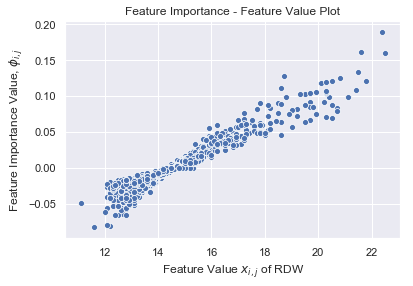

In [60]:
import matplotlib.pyplot as plt
ax = sns.scatterplot(plot_X, plot_Y) 
plt.xlabel('Feature Value ' + r'$x_{i,j}$' + ' of ' + features_chosen[idx] ) 
# frequency label 
plt.ylabel('Feature Importance Value, ' + r'$\phi_{i,j}$') 
# plot title 
plt.title('Feature Importance - Feature Value Plot')
plt.show()

#### Feature 2: RDW

In [ ]:
# Create the arrays for X and Y, remove NANs
idx = shap_population_rank[1]
plot_X = np.array(Xtest_bef_imp[features_chosen[idx]])
plot_Y = shap_population[:,idx]
mask = ~np.isnan(plot_X)
plot_X = plot_X[mask]
plot_Y = plot_Y[mask]

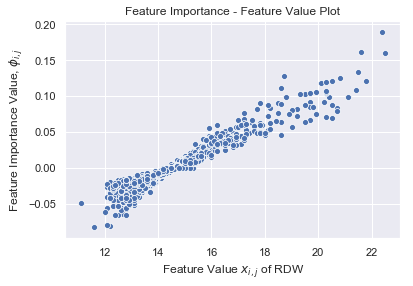

In [61]:
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
ax = sns.scatterplot(plot_X, plot_Y) 
plt.xlabel('Feature Value ' + r'$x_{i,j}$' + ' of ' + features_chosen[idx] ) 
# frequency label 
plt.ylabel('Feature Importance Value, ' + r'$\phi_{i,j}$') 
# plot title 
plt.title('Feature Importance - Feature Value Plot')
plt.show()

#### Feature 3

In [ ]:
# Create the arrays for X and Y, remove NANs
idx = shap_population_rank[2]
plot_X = np.array(Xtest_bef_imp[features_chosen[idx]])
plot_Y = shap_population[:,idx]
mask = ~np.isnan(plot_X)
plot_X = plot_X[mask]
plot_Y = plot_Y[mask]

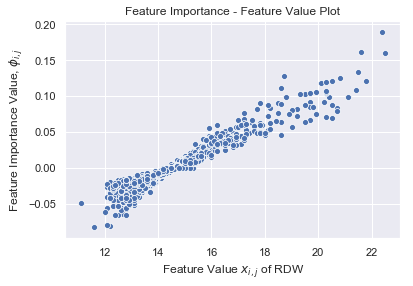

In [62]:
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
ax = sns.scatterplot(plot_X, plot_Y) 
plt.xlabel('Feature Value ' + r'$x_{i,j}$' + ' of ' + features_chosen[idx] ) 
# frequency label 
plt.ylabel('Feature Importance Value, ' + r'$\phi_{i,j}$') 
# plot title 
plt.title('Feature Importance - Feature Value Plot')
plt.show()

#### Feature 4

In [ ]:
# Create the arrays for X and Y, remove NANs
idx = shap_population_rank[3]
plot_X = np.array(Xtest_bef_imp[features_chosen[idx]])
plot_Y = shap_population[:,idx]
mask = ~np.isnan(plot_X)
plot_X = plot_X[mask]
plot_Y = plot_Y[mask]

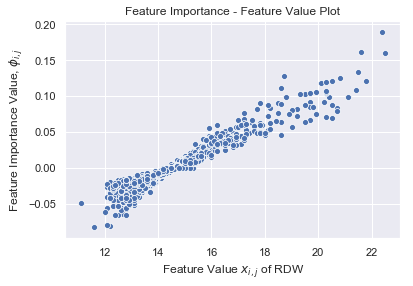

In [63]:
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
ax = sns.scatterplot(plot_X, plot_Y) 
plt.xlabel('Feature Value ' + r'$x_{i,j}$' + ' of ' + features_chosen[idx] ) 
# frequency label 
plt.ylabel('Feature Importance Value, ' + r'$\phi_{i,j}$') 
# plot title 
plt.title('Feature Importance - Feature Value Plot')
plt.show()

#### Plot a graph with a higher level of granularity

In [ ]:
Y_pred = np.round(0.2*(LR_calibrated.predict(Xtest) + RF_calibrated.predict(Xtest) + XGBoost_calibrated.predict(Xtest) + MLP_calibrated.predict(Xtest) + SVC_best_calibrated.predict(Xtest)))

## For the RDW feature, split between (1) Ytest and (2) Y_pred

idx = shap_population_rank[1]
plot_X = np.array(Xtest_bef_imp[features_chosen[idx]])
plot_Y = shap_population[:,idx]
mask = ~np.isnan(plot_X)
plot_X = plot_X[mask]
plot_Y = plot_Y[mask]

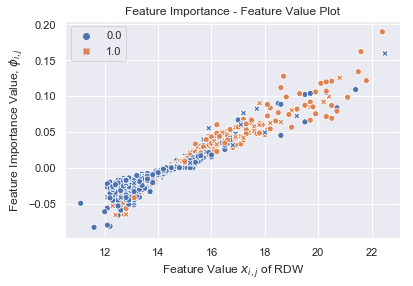

In [64]:
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
ax = sns.scatterplot(plot_X, plot_Y,hue=Y_pred[mask],style=np.logical_xor(Y_pred[mask],Ytest[mask].values.ravel()).astype(int)) 
plt.xlabel('Feature Value ' + r'$x_{i,j}$' + ' of ' + features_chosen[idx] ) 
# frequency label 
plt.ylabel('Feature Importance Value, ' + r'$\phi_{i,j}$') 
# plot title 
plt.title('Feature Importance - Feature Value Plot')
plt.show()

#### Fish for something interesting

In [69]:
shap_population_rank

array([ 0, 26, 73, 32, 72, 53, 64, 74, 16, 71, 48, 36, 67,  8, 45, 35, 87,
       55, 76, 61, 51, 57, 13, 21, 86, 58, 49,  7, 56, 30, 80, 70, 20,  2,
       17, 12, 28, 82, 66, 50, 68, 54,  1, 60, 52, 59, 14,  3, 63, 69, 34,
       78, 11, 27, 79, 62, 85, 65, 23, 41, 46, 29, 88, 83, 19, 81, 43, 10,
        6, 38, 33, 47, 84, 24, 77, 25, 31, 40, 18, 15,  9, 75, 22,  4, 39,
       42,  5, 44, 37], dtype=int64)

In [ ]:
Y_pred = np.round(0.2*(LR_calibrated.predict(Xtest) + RF_calibrated.predict(Xtest) + XGBoost_calibrated.predict(Xtest) + MLP_calibrated.predict(Xtest) + SVC_best_calibrated.predict(Xtest)))

## For the RDW feature, split between (1) Ytest and (2) Y_pred

idx = shap_population_rank[24]
plot_X = np.array(Xtest_bef_imp[features_chosen[idx]])
plot_Y = shap_population[:,idx]
mask = ~np.isnan(plot_X)
plot_X = plot_X[mask]
plot_Y = plot_Y[mask]

import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
ax = sns.scatterplot(plot_X, plot_Y,hue=Y_pred[mask],style=np.logical_xor(Y_pred[mask],Ytest[mask].values.ravel()).astype(int)) 
plt.xlabel('Feature Value ' + r'$x_{i,j}$' + ' of ' + features_chosen[idx] ) 
# frequency label 
plt.ylabel('Feature Importance Value, ' + r'$\phi_{i,j}$') 
# plot title 
plt.title('Feature Importance - Feature Value Plot')
plt.show()

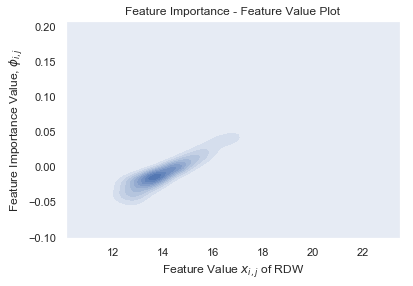

In [65]:
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
idx = shap_population_rank[1]
ax = sns.kdeplot(plot_X, plot_Y, shade=True) 
plt.xlabel('Feature Value ' + r'$x_{i,j}$' + ' of ' + features_chosen[idx] ) 
# frequency label 
plt.ylabel('Feature Importance Value, ' + r'$\phi_{i,j}$') 
# plot title 
plt.title('Feature Importance - Feature Value Plot')
plt.show()

### 10. Alignment in model functions

In [ ]:
#### Get basic SHAP values for the four models

# Get a bunch of SHAP values for the entire population
shap_population_LR = np.zeros((990,89))
for i in range(990):
    shap_population_LR[i,:] = return_shaps_final(Xtest,i,[LR_SHAP])
    
shap_population_RF = np.zeros((990,89))
for i in range(990):
    shap_population_RF[i,:] = return_shaps_final(Xtest,i,[RF_SHAP])
    
shap_population_XGB = np.zeros((990,89))
for i in range(990):
    shap_population_XGB[i,:] = return_shaps_final(Xtest,i,[XGB_SHAP])
    
shap_population_MLP = np.zeros((990,89))
for i in range(990):
    shap_population_MLP[i,:] = return_shaps_final(Xtest,i,[MLP_SHAP])
    

#### 1. Plot Logistic Regression

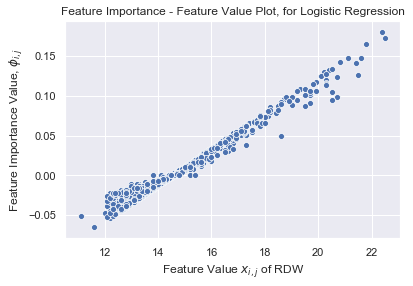

In [70]:
# Create the arrays for X and Y, remove NANs
idx = shap_population_rank[1]
plot_X = np.array(Xtest_bef_imp[features_chosen[idx]])
plot_Y = shap_population_LR[:,idx]
mask = ~np.isnan(plot_X)
plot_X = plot_X[mask]
plot_Y = plot_Y[mask]

import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
ax = sns.scatterplot(plot_X, plot_Y) 
plt.xlabel('Feature Value ' + r'$x_{i,j}$' + ' of ' + features_chosen[idx] ) 
# frequency label 
plt.ylabel('Feature Importance Value, ' + r'$\phi_{i,j}$') 
# plot title 
plt.title('Feature Importance - Feature Value Plot, for Logistic Regression')
plt.show()

#### 2. Plot Random Forest

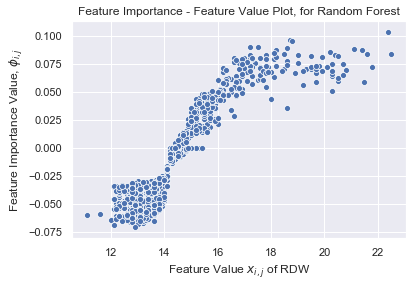

In [71]:
# Create the arrays for X and Y, remove NANs
idx = shap_population_rank[1]
plot_X = np.array(Xtest_bef_imp[features_chosen[idx]])
plot_Y = shap_population_RF[:,idx]
mask = ~np.isnan(plot_X)
plot_X = plot_X[mask]
plot_Y = plot_Y[mask]

import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
ax = sns.scatterplot(plot_X, plot_Y) 
plt.xlabel('Feature Value ' + r'$x_{i,j}$' + ' of ' + features_chosen[idx] ) 
# frequency label 
plt.ylabel('Feature Importance Value, ' + r'$\phi_{i,j}$') 
# plot title 
plt.title('Feature Importance - Feature Value Plot, for Random Forest')
plt.show()

#### 3. Plot XGBoost

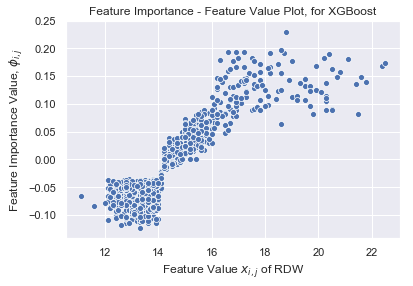

In [72]:
# Create the arrays for X and Y, remove NANs
idx = shap_population_rank[1]
plot_X = np.array(Xtest_bef_imp[features_chosen[idx]])
plot_Y = shap_population_XGB[:,idx]
mask = ~np.isnan(plot_X)
plot_X = plot_X[mask]
plot_Y = plot_Y[mask]

import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
ax = sns.scatterplot(plot_X, plot_Y) 
plt.xlabel('Feature Value ' + r'$x_{i,j}$' + ' of ' + features_chosen[idx] ) 
# frequency label 
plt.ylabel('Feature Importance Value, ' + r'$\phi_{i,j}$') 
# plot title 
plt.title('Feature Importance - Feature Value Plot, for XGBoost')
plt.show()

#### 4. Plot MLP

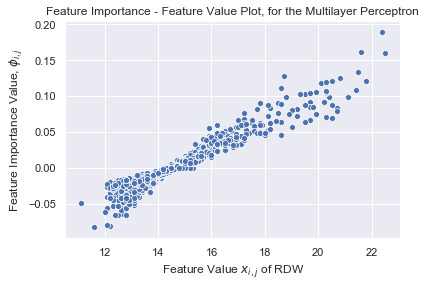

In [73]:
# Create the arrays for X and Y, remove NANs
idx = shap_population_rank[1]
plot_X = np.array(Xtest_bef_imp[features_chosen[idx]])
plot_Y = shap_population_MLP[:,idx]
mask = ~np.isnan(plot_X)
plot_X = plot_X[mask]
plot_Y = plot_Y[mask]

import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
ax = sns.scatterplot(plot_X, plot_Y) 
plt.xlabel('Feature Value ' + r'$x_{i,j}$' + ' of ' + features_chosen[idx] ) 
# frequency label 
plt.ylabel('Feature Importance Value, ' + r'$\phi_{i,j}$') 
# plot title 
plt.title('Feature Importance - Feature Value Plot, for the Multilayer Perceptron')
plt.show()

In [ ]:
# Calculate the amount of alignment in models

### 11. Explainable Curves

In [ ]:
import seaborn as sns; sns.set(color_codes=True)

In [ ]:
bins = 400

# Define these features 
feature_values_A_flip = np.zeros((bins,89)); feature_values_B_flip = np.zeros((bins,89)); feature_values_C_flip = np.zeros((bins,89))
# SHAP values
shap_values_A_exp = np.zeros((bins,89)); shap_values_B_exp = np.zeros((bins,89)); shap_values_C_exp = np.zeros((bins,89))

#### Patient A

In [ ]:
for i in np.argsort(np.abs(shap_values_A[-1,:]))[::-1][:10]:
    print(str(i) + " " + features_chosen[i] + ": %.4f" % (shap_values_A[-1,i]))

In [ ]:
## 
idx = 26;
for i in range(bins):
    print(i)
    instance_temp = Xtest.iloc[86:87,:].copy()
    instance_temp.iloc[:,idx] = i/bins
    feature_values_A_flip[i,:] = instance_temp
    shap_values_A_exp[i,:] = return_shaps_final(instance_temp, 0, [LR_SHAP,RF_SHAP,XGB_SHAP,MLP_SHAP])

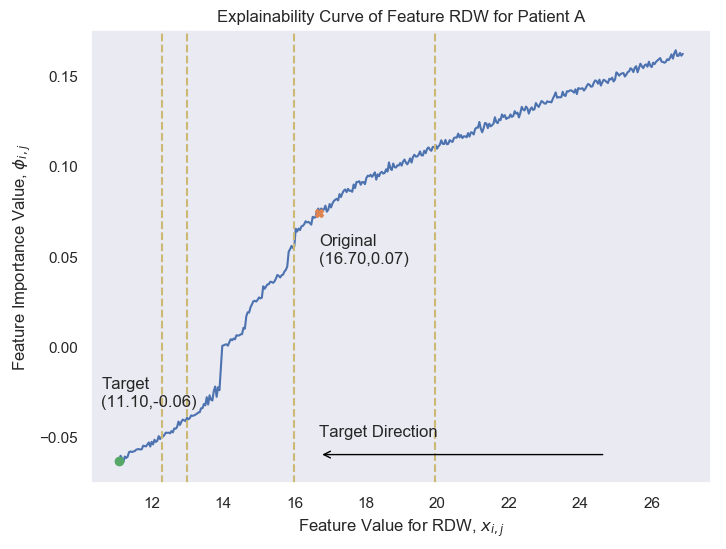

In [74]:
## Plot the graph
idx = 26; bins = 400;
plt.figure(figsize=(8,6), dpi=100)
import matplotlib.pyplot as plt

# Plot SHAP
plt.plot(np.arange(min(X[features_chosen[idx]]),max(X[features_chosen[idx]]),
             (max(X[features_chosen[idx]])-min(X[features_chosen[idx]]))/bins),
                shaps_A_all[:,idx])

# Original Value
plt.plot(Xtest_bef_imp.iloc[86,idx],shap_values_A[-1,idx]+0.008,"X")
plt.annotate('Original', (Xtest_bef_imp.iloc[86,idx],shap_values_A[5,idx]-0.01),  xycoords='data', )
plt.annotate("(%.2f,%.2f)" %(Xtest_bef_imp.iloc[86,idx],shap_values_A[5,idx]), 
             (Xtest_bef_imp.iloc[86,idx],shap_values_A[-1,idx]-0.01-0.01),  xycoords='data',)

# Target Value
plt.plot(min(X[features_chosen[idx]]),shaps_A_all[0,idx],'o')
plt.annotate('Target', (min(X[features_chosen[idx]])-0.5,shaps_A_all[0,idx]+0.04),  xycoords='data', )
plt.annotate("(%.2f,%.2f)" %(min(X[features_chosen[idx]]),shaps_A_all[0,idx]), 
             (min(X[features_chosen[idx]])-0.5,shaps_A_all[0,idx]+0.03), xycoords='data',)

# Target Direction, Text
plt.annotate('Target Direction', (Xtest_bef_imp.iloc[86,idx],-0.05),  xycoords='data', )
# Target Direction, Arrow
plt.annotate("",xy=(Xtest_bef_imp.iloc[86,idx],-0.06), xycoords='data',
            xytext=(Xtest_bef_imp.iloc[86,idx]+8,-0.06), textcoords='data',
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color='black',))

plt.axvline(data_percentiles.iloc[0,idx],color='y',linestyle='--'); 
plt.axvline(data_percentiles.iloc[1,idx],color='y',linestyle='--');
plt.axvline(data_percentiles.iloc[3,idx],color='y',linestyle='--'); 
plt.axvline(data_percentiles.iloc[4,idx],color='y',linestyle='--');
plt.xlabel('Feature Value for RDW, $x_{i,j}$') 
plt.ylabel('Feature Importance Value, $\phi_{i,j}$')
plt.title('Explainability Curve of Feature '+ features_chosen[idx]+' for Patient A')
plt.grid(b=None)
plt.show()


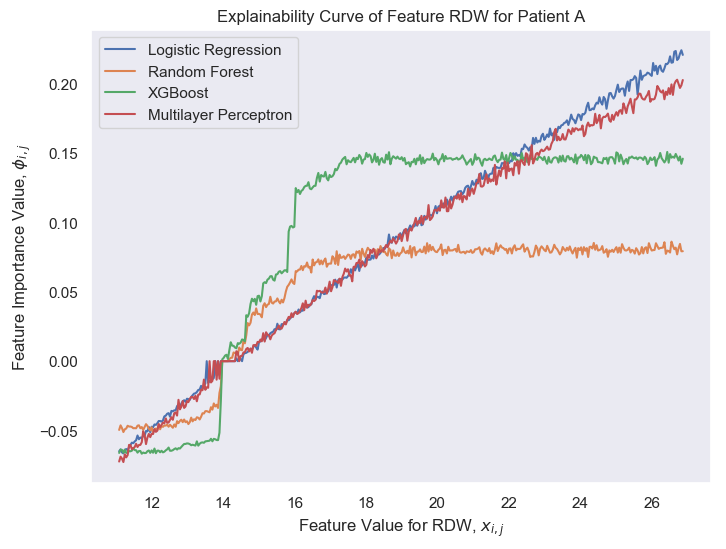

In [75]:
## Plot the graph
idx = 26; bins = 400;

import matplotlib.pyplot as plt
plt.figure(figsize=(8,6), dpi=100)
plt.plot(np.arange(min(X[features_chosen[idx]]),max(X[features_chosen[idx]]),(max(X[features_chosen[idx]])-min(X[features_chosen[idx]]))/bins),
                shaps_A_LR[:,idx], label='Logistic Regression') 
plt.plot(np.arange(min(X[features_chosen[idx]]),max(X[features_chosen[idx]]),(max(X[features_chosen[idx]])-min(X[features_chosen[idx]]))/bins),
                shaps_A_RF[:,idx], label='Random Forest') 
plt.plot(np.arange(min(X[features_chosen[idx]]),max(X[features_chosen[idx]]),(max(X[features_chosen[idx]])-min(X[features_chosen[idx]]))/bins),
                shaps_A_XGB[:,idx], label='XGBoost') 
plt.plot(np.arange(min(X[features_chosen[idx]]),max(X[features_chosen[idx]]),(max(X[features_chosen[idx]])-min(X[features_chosen[idx]]))/bins),
                shaps_A_MLP[:,idx], label='Multilayer Perceptron') 
#plt.plot(np.arange(min(X[features_chosen[idx]]),max(X[features_chosen[idx]]),(max(X[features_chosen[idx]])-min(X[features_chosen[idx]]))/bins),    shaps_A_all[:,idx], label='All') 
plt.xlabel('Feature Value for RDW, $x_{i,j}$') 
plt.ylabel('Feature Importance Value, $\phi_{i,j}$')
plt.title('Explainability Curve of Feature '+ features_chosen[idx]+' for Patient A')
plt.legend()
plt.grid(b=None)
plt.show()

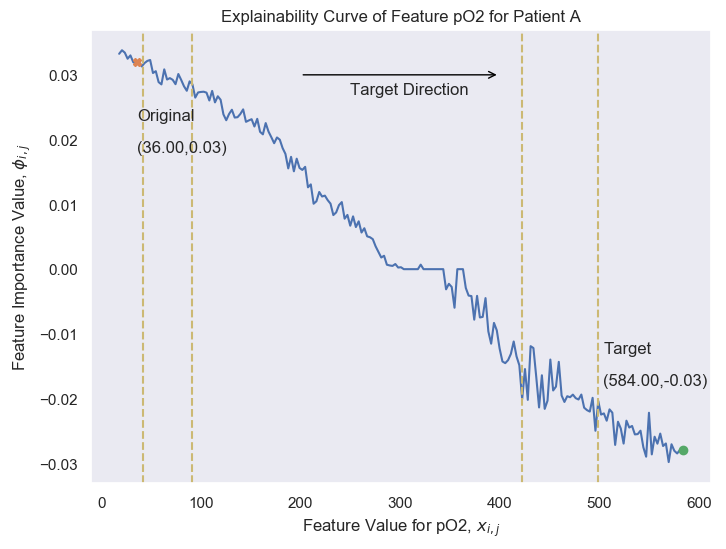

In [76]:
## Plot the graph
idx = 36; bins = 200;
plt.figure(figsize=(8,6), dpi=100)
import matplotlib.pyplot as plt

# Plot SHAP
plt.plot(np.arange(min(X[features_chosen[idx]]),max(X[features_chosen[idx]]),
             (max(X[features_chosen[idx]])-min(X[features_chosen[idx]]))/bins),
                shaps_A_all_2[:,idx])

# Original Value
plt.plot(Xtest_bef_imp.iloc[86,idx],shap_values_A[5,idx]+0.011,"X")
plt.annotate('Original', (Xtest_bef_imp.iloc[86,idx],shap_values_A[5,idx]-0.005+0.007),  xycoords='data', )
plt.annotate("(%.2f,%.2f)" %(Xtest_bef_imp.iloc[86,idx],shap_values_A[5,idx]+0.011), 
             (Xtest_bef_imp.iloc[86,idx],shap_values_A[5,idx]-0.01+0.007),  xycoords='data',)

# Target Value
plt.plot(max(X[features_chosen[idx]]), shaps_A_all_2[bins-1,idx],'o')
plt.annotate('Target', (max(X[features_chosen[idx]])-80,shaps_A_all_2[bins-1,idx]+0.015),  xycoords='data', )
plt.annotate("(%.2f,%.2f)" %(max(X[features_chosen[idx]]),shaps_A_all_2[bins-1,idx]), 
             (max(X[features_chosen[idx]])-80,shaps_A_all_2[bins-1,idx]+0.01), xycoords='data',)

# Target Direction, Text
plt.annotate('Target Direction', (250,0.027),  xycoords='data', )
# Target Direction, Arrow
plt.annotate("",xy=(400,0.03), xycoords='data',
            xytext=(200,0.03), textcoords='data',
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color='black',))

plt.axvline(data_percentiles.iloc[0,idx],color='y',linestyle='--'); 
plt.axvline(data_percentiles.iloc[1,idx],color='y',linestyle='--');
plt.axvline(data_percentiles.iloc[3,idx],color='y',linestyle='--'); 
plt.axvline(data_percentiles.iloc[4,idx],color='y',linestyle='--');
plt.xlabel('Feature Value for ' + features_chosen[idx]+ ', $x_{i,j}$') 
plt.ylabel('Feature Importance Value, $\phi_{i,j}$')
plt.title('Explainability Curve of Feature '+ features_chosen[idx]+' for Patient A')
plt.grid(b=None)
plt.show()


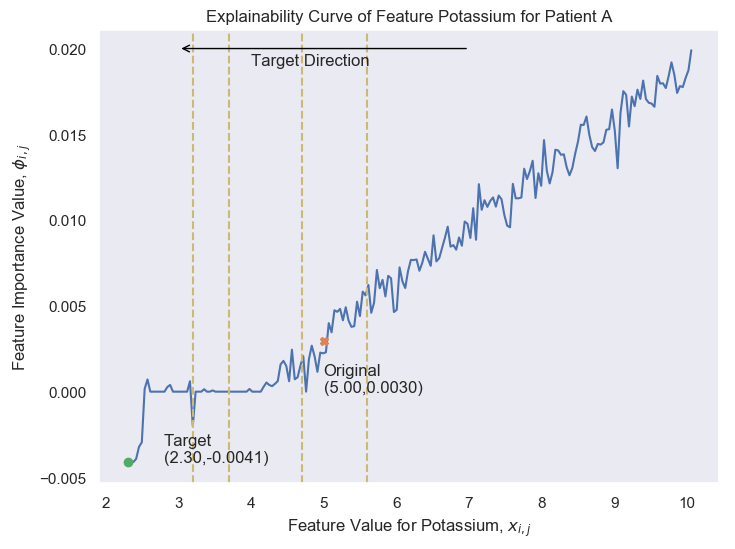

In [77]:
## Plot the graph
idx = 24;  bins = 200;
plt.figure(figsize=(8,6), dpi=100)
import matplotlib.pyplot as plt

# Plot SHAP
plt.plot(np.arange(min(X[features_chosen[idx]]),max(X[features_chosen[idx]]),
             (max(X[features_chosen[idx]])-min(X[features_chosen[idx]]))/bins)[2:],
                shaps_A_all_3[2:,idx])

# Original Value
plt.plot(Xtest_bef_imp.iloc[86,idx],shap_values_A[5,idx],"X")
plt.annotate('Original', (Xtest_bef_imp.iloc[86,idx],shap_values_A[5,idx]-.002),  xycoords='data', )
plt.annotate("(%.2f,%.4f)" %(Xtest_bef_imp.iloc[86,idx],shap_values_A[5,idx]), 
             (Xtest_bef_imp.iloc[86,idx],shap_values_A[5,idx]-.003),  xycoords='data',)

# Target Value
plt.plot(min(X[features_chosen[idx]]), shaps_A_all_3[2,idx],'o')
plt.annotate('Target', (min(X[features_chosen[idx]])+0.5,shaps_A_all_3[2,idx]+0.001),  xycoords='data', )
plt.annotate("(%.2f,%.4f)" %(min(X[features_chosen[idx]]),shaps_A_all_3[2,idx]), 
             (min(X[features_chosen[idx]])+0.5,shaps_A_all_3[2,idx]), xycoords='data',)

# Target Direction, Text
plt.annotate('Target Direction', (Xtest_bef_imp.iloc[86,idx]-1,0.019),  xycoords='data', )
# Target Direction, Arrow
plt.annotate("",xy=(Xtest_bef_imp.iloc[86,idx]-2, 0.02), xycoords='data',
            xytext=(Xtest_bef_imp.iloc[86,idx]+2,0.02), textcoords='data',
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color='black',))

plt.axvline(data_percentiles.iloc[0,idx],color='y',linestyle='--'); 
plt.axvline(data_percentiles.iloc[1,idx],color='y',linestyle='--');
plt.axvline(data_percentiles.iloc[3,idx],color='y',linestyle='--'); 
plt.axvline(data_percentiles.iloc[4,idx],color='y',linestyle='--');
plt.xlabel('Feature Value for ' + features_chosen[idx]+ ', $x_{i,j}$') 
plt.ylabel('Feature Importance Value, $\phi_{i,j}$')
plt.title('Explainability Curve of Feature '+ features_chosen[idx]+' for Patient A')
plt.grid(b=None)
plt.show()


#### Patient B

In [ ]:
for i in np.argsort(np.abs(shap_values_B[-1,:]))[::-1][:10]:
    print(str(i) + " " + features_chosen[i] + ": %.4f" % (shap_values_B[-1,i]))

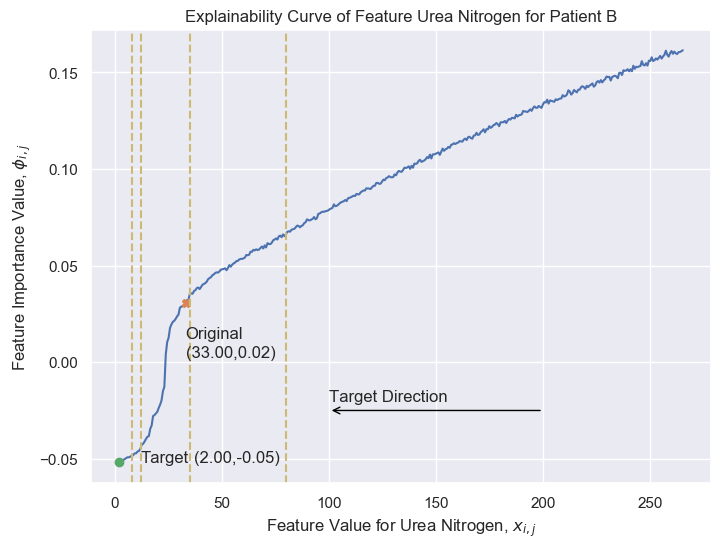

In [78]:
## Plot the graph
idx = 32; bins = 400
plt.figure(figsize=(8,6), dpi=100)
import matplotlib.pyplot as plt
plt.plot(np.arange(min(X[features_chosen[idx]]),max(X[features_chosen[idx]]),
             (max(X[features_chosen[idx]])-min(X[features_chosen[idx]]))/bins),
                shaps_B_all[:,idx])

# Original Value
plt.plot(Xtest_bef_imp.iloc[404,idx],shap_values_B[-1,idx]+0.008,"X")
plt.annotate('Original', (Xtest_bef_imp.iloc[404,idx],shap_values_B[-1,idx]-0.01),  xycoords='data', )
plt.annotate("(%.2f,%.2f)" %(Xtest_bef_imp.iloc[404,idx],shap_values_B[5,idx]), 
             (Xtest_bef_imp.iloc[404,idx],shap_values_B[5,idx]-0.01-0.01),  xycoords='data',)

# Target Value
plt.plot(min(X[features_chosen[idx]]),shaps_B_all[0,idx],'o')
plt.annotate('Target', (min(X[features_chosen[idx]]) + 10,shaps_B_all[0,idx]),  xycoords='data', )
plt.annotate("(%.2f,%.2f)" %(min(X[features_chosen[idx]]),shaps_B_all[0,idx]), 
             (min(X[features_chosen[idx]]) + 35,shaps_B_all[0,idx]), xycoords='data',)

# Target Direction, Text
plt.annotate('Target Direction', (100, -0.02),  xycoords='data', )
# Target Direction, Arrow
plt.annotate("",xy=(100, -0.025), xycoords='data',
            xytext=(200, -0.025), textcoords='data',
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color='black',))

plt.axvline(data_percentiles.iloc[0,idx],color='y',linestyle='--'); 
plt.axvline(data_percentiles.iloc[1,idx],color='y',linestyle='--');
plt.axvline(data_percentiles.iloc[3,idx],color='y',linestyle='--'); 
plt.axvline(data_percentiles.iloc[4,idx],color='y',linestyle='--');
plt.xlabel('Feature Value for '+ features_chosen[idx]+', $x_{i,j}$') 
plt.ylabel('Feature Importance Value, $\phi_{i,j}$')
plt.title('Explainability Curve of Feature '+ features_chosen[idx]+' for Patient B')
#plt.grid(b=None)
plt.show()


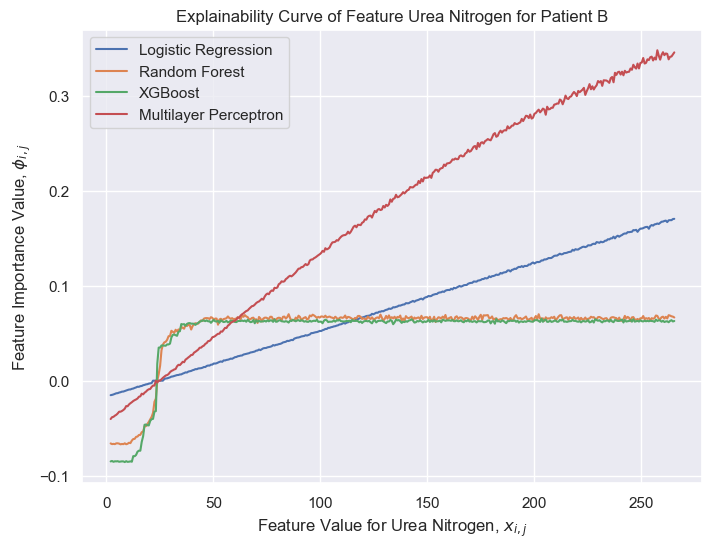

In [79]:
## Plot the  graph
idx = 32; bins = 400

import matplotlib.pyplot as plt
plt.figure(figsize=(8,6), dpi=100)
plt.plot(np.arange(min(X[features_chosen[idx]]),max(X[features_chosen[idx]]),(max(X[features_chosen[idx]])-min(X[features_chosen[idx]]))/bins),
                shaps_B_LR[:,idx], label='Logistic Regression') 
plt.plot(np.arange(min(X[features_chosen[idx]]),max(X[features_chosen[idx]]),(max(X[features_chosen[idx]])-min(X[features_chosen[idx]]))/bins),
                shaps_B_RF[:,idx], label='Random Forest') 
plt.plot(np.arange(min(X[features_chosen[idx]]),max(X[features_chosen[idx]]),(max(X[features_chosen[idx]])-min(X[features_chosen[idx]]))/bins),
                shaps_B_XGB[:,idx], label='XGBoost') 
plt.plot(np.arange(min(X[features_chosen[idx]]),max(X[features_chosen[idx]]),(max(X[features_chosen[idx]])-min(X[features_chosen[idx]]))/bins),
                shaps_B_MLP[:,idx], label='Multilayer Perceptron') 
#plt.plot(np.arange(min(X[features_chosen[idx]]),max(X[features_chosen[idx]]),(max(X[features_chosen[idx]])-min(X[features_chosen[idx]]))/bins),                shaps_A_all[:,idx], label='All') 
plt.xlabel('Feature Value for '  + features_chosen[idx] + ', ' + '$x_{i,j}$') 
plt.ylabel('Feature Importance Value, $\phi_{i,j}$')
plt.title('Explainability Curve of Feature '+ features_chosen[idx]+' for Patient B')
plt.legend()
plt.show()

#### Patient C

In [ ]:
for i in np.argsort(np.abs(shap_values_C[-1,:]))[::-1][:10]:
    print(str(i) + " " + features_chosen[i] + ": %.4f" % (shap_values_C[-1,i]))

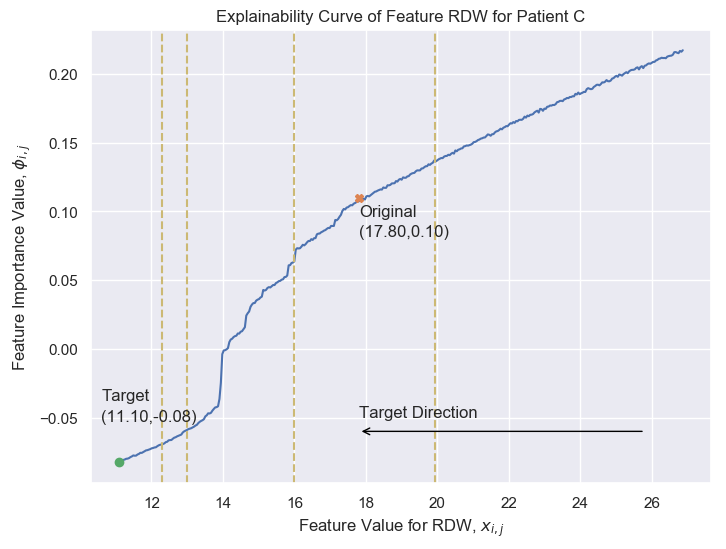

In [80]:
## Plot the  graph
idx = 26
plt.figure(figsize=(8,6), dpi=100)
import matplotlib.pyplot as plt
plt.plot(np.arange(min(X[features_chosen[idx]]),max(X[features_chosen[idx]]),
             (max(X[features_chosen[idx]])-min(X[features_chosen[idx]]))/bins),
                shaps_C_all[:,idx])

# Original Value
plt.plot(Xtest_bef_imp.iloc[147,idx],shap_values_C[-1,idx]+0.008,"X")
plt.annotate('Original', (Xtest_bef_imp.iloc[147,idx],shap_values_C[-1,idx]-0.005),  xycoords='data', )
plt.annotate("(%.2f,%.2f)" %(Xtest_bef_imp.iloc[147,idx],shap_values_C[5,idx]), (Xtest_bef_imp.iloc[147,idx],shap_values_C[5,idx]-0.01-0.01),  xycoords='data',)

# Target Value
plt.plot(min(X[features_chosen[idx]]),shaps_C_all[0,idx],'o')
plt.annotate('Target', (min(X[features_chosen[idx]])- 0.5,shaps_C_all[0,idx] + 0.045),  xycoords='data', )
plt.annotate("(%.2f,%.2f)" %(min(X[features_chosen[idx]]),shaps_C_all[0,idx]), (min(X[features_chosen[idx]])-0.5,shaps_C_all[0,idx]+0.03), xycoords='data',)

# Target Direction, Text
plt.annotate('Target Direction', (Xtest_bef_imp.iloc[147,idx],-0.05),  xycoords='data', )
# Target Direction, Arrow
plt.annotate("",xy=(Xtest_bef_imp.iloc[147,idx],-0.06), xycoords='data',
            xytext=(Xtest_bef_imp.iloc[147,idx]+8,-0.06), textcoords='data',
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color='black',))

plt.axvline(data_percentiles.iloc[0,idx],color='y',linestyle='--'); 
plt.axvline(data_percentiles.iloc[1,idx],color='y',linestyle='--');
plt.axvline(data_percentiles.iloc[3,idx],color='y',linestyle='--'); 
plt.axvline(data_percentiles.iloc[4,idx],color='y',linestyle='--');
plt.xlabel('Feature Value for '+ features_chosen[idx]+', $x_{i,j}$') 
plt.ylabel('Feature Importance Value, $\phi_{i,j}$')
plt.title('Explainability Curve of Feature '+ features_chosen[idx]+' for Patient C')
plt.show()


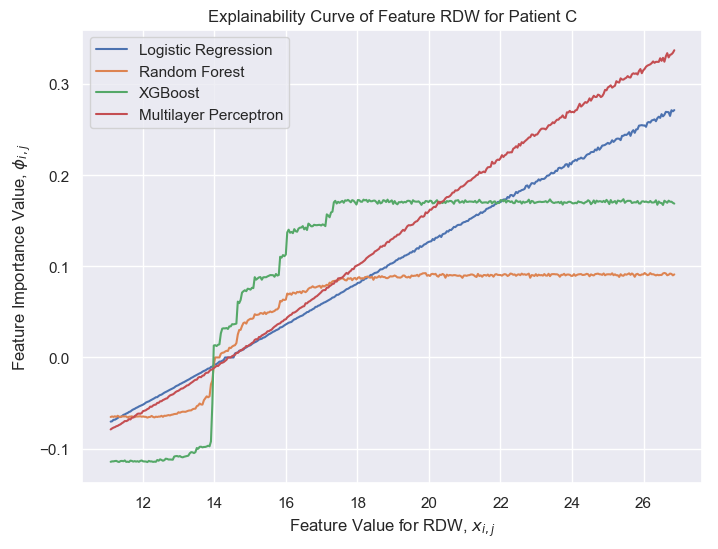

In [81]:
## Plot the  graph
idx = 26

import matplotlib.pyplot as plt
plt.figure(figsize=(8,6), dpi=100)
plt.plot(np.arange(min(X[features_chosen[idx]]),max(X[features_chosen[idx]]),(max(X[features_chosen[idx]])-min(X[features_chosen[idx]]))/bins),
                shaps_C_LR[:,idx], label='Logistic Regression') 
plt.plot(np.arange(min(X[features_chosen[idx]]),max(X[features_chosen[idx]]),(max(X[features_chosen[idx]])-min(X[features_chosen[idx]]))/bins),
                shaps_C_RF[:,idx], label='Random Forest') 
plt.plot(np.arange(min(X[features_chosen[idx]]),max(X[features_chosen[idx]]),(max(X[features_chosen[idx]])-min(X[features_chosen[idx]]))/bins),
                shaps_C_XGB[:,idx], label='XGBoost') 
plt.plot(np.arange(min(X[features_chosen[idx]]),max(X[features_chosen[idx]]),(max(X[features_chosen[idx]])-min(X[features_chosen[idx]]))/bins),
                shaps_C_MLP[:,idx], label='Multilayer Perceptron') 

plt.xlabel('Feature Value for '  + features_chosen[idx] + ', ' + '$x_{i,j}$') 
plt.ylabel('Feature Importance Value, $\phi_{i,j}$')
plt.title('Explainability Curve of Feature '+ features_chosen[idx]+' for Patient C')
plt.legend()
plt.show()

#### Get explainable information across the whole thing

In [ ]:
band_1 = np.nanpercentile(shap_population_test[:,:100,idx],5,axis=0)
band_2 = np.nanpercentile(shap_population_test[:,:100,idx],15.865,axis=0)
band_3 = np.nanpercentile(shap_population_test[:,:100,idx],50,axis=0)
band_4 = np.nanpercentile(shap_population_test[:,:100,idx],84.135,axis=0)
band_5 = np.nanpercentile(shap_population_test[:,:100,idx],95,axis=0)

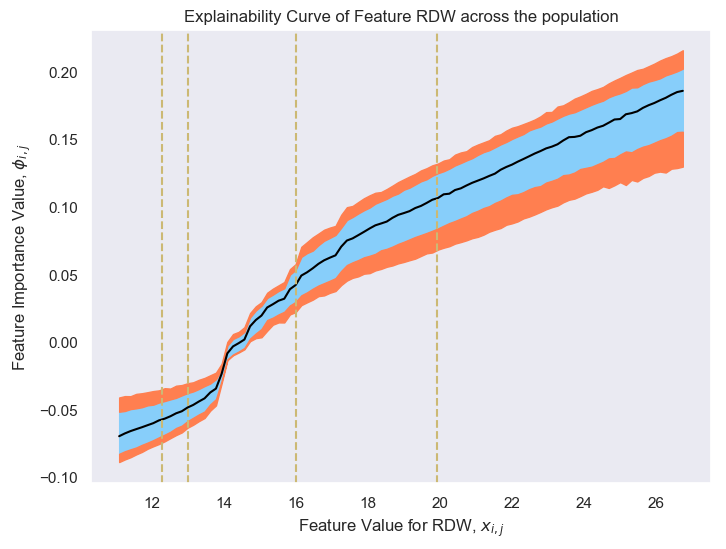

In [82]:
## Plot the graph
idx = 26; bins = 100
plt.figure(figsize=(8,6), dpi=100)
import matplotlib.pyplot as plt
plt.plot(np.arange(min(X[features_chosen[idx]]),max(X[features_chosen[idx]]), 
                  (max(X[features_chosen[idx]])-min(X[features_chosen[idx]]))/bins), 
                 band_3,color='black')

# 1 SD
plt.fill_between(np.arange(min(X[features_chosen[idx]]),max(X[features_chosen[idx]]), 
                  (max(X[features_chosen[idx]])-min(X[features_chosen[idx]]))/bins), 
                 band_2, band_4,color='lightskyblue')
# Within 2 SD
plt.fill_between(np.arange(min(X[features_chosen[idx]]),max(X[features_chosen[idx]]), 
                  (max(X[features_chosen[idx]])-min(X[features_chosen[idx]]))/bins), 
                 band_1, band_2,color='coral')
plt.fill_between(np.arange(min(X[features_chosen[idx]]),max(X[features_chosen[idx]]), 
                  (max(X[features_chosen[idx]])-min(X[features_chosen[idx]]))/bins), 
                 band_4, band_5,color='coral')

# After 2 SD
#plt.fill_between(np.arange(min(X[features_chosen[idx]]),max(X[features_chosen[idx]]), 
#                  (max(X[features_chosen[idx]])-min(X[features_chosen[idx]]))/bins), 
#                 np.nanpercentile(shap_population_test[:,:100,idx],2.5,axis=0), band_1,color='red')
#plt.fill_between(np.arange(min(X[features_chosen[idx]]),max(X[features_chosen[idx]]), 
#                  (max(X[features_chosen[idx]])-min(X[features_chosen[idx]]))/bins), 
#                 band_5, np.nanpercentile(shap_population_test[:,:100,idx],97.5,axis=0),color='red')

plt.axvline(data_percentiles.iloc[0,idx],color='y',linestyle='--'); 
plt.axvline(data_percentiles.iloc[1,idx],color='y',linestyle='--');
plt.axvline(data_percentiles.iloc[3,idx],color='y',linestyle='--'); 
plt.axvline(data_percentiles.iloc[4,idx],color='y',linestyle='--');
plt.xlabel('Feature Value for '+ features_chosen[idx]+', $x_{i,j}$') 
plt.ylabel('Feature Importance Value, $\phi_{i,j}$')
plt.title('Explainability Curve of Feature '+ features_chosen[idx]+' across the population')
plt.grid(b=None)
plt.show()


### 12. Using explainability for Feature Selection

#### Get the model scores from the various outcomes

In [ ]:
### Start with the ranking of features
shap_population_rank
### Create an array to store the information
model_outputs_acc_train = np.zeros((len(shap_population_rank),5))
model_outputs_acc_test = np.zeros((len(shap_population_rank),5))
model_outputs_F1_train = np.zeros((len(shap_population_rank),5))
model_outputs_F1_test = np.zeros((len(shap_population_rank),5))

for i in range(len(shap_population_rank)):
    shap_population_rank_red = shap_population_rank[:(89-i)]
    print("Length of feature set: " + str(len(shap_population_rank_red)))

    Xtrain_subset = Xtrain[features_chosen[shap_population_rank_red]]
    Xtest_subset = Xtest[features_chosen[shap_population_rank_red]]
    
    from sklearn.linear_model import LogisticRegression
    from sklearn.calibration import CalibratedClassifierCV
    LR_temp = LogisticRegression(solver='liblinear',penalty="l2",multi_class='ovr',max_iter=5)
    
    LR_temp.fit(Xtrain_subset,Ytrain)
    print("Logistic Regression")
    print("Training Accuracy: " + str(round(accuracy_score(Ytrain,LR_temp.predict(Xtrain_subset)), 6)))
    print("Training ROC-AUC: " + str(round(roc_auc_score(Ytrain,LR_temp.predict(Xtrain_subset)), 6)))
    print("Training F1: " + str(round(f1_score(Ytrain,LR_temp.predict(Xtrain_subset)), 6)))
    print("Test Accuracy: " + str(round(accuracy_score(Ytest,LR_temp.predict(Xtest_subset)), 6)))
    print("Test ROC-AUC: " + str(round(roc_auc_score(Ytest,LR_temp.predict(Xtest_subset)), 6)))
    print("Test F1: " + str(round(f1_score(Ytest,LR_temp.predict(Xtest_subset)), 6)))
    
    model_outputs_acc_train[i,0] = accuracy_score(Ytrain,LR_temp.predict(Xtrain_subset))
    model_outputs_acc_test[i,0] = accuracy_score(Ytest,LR_temp.predict(Xtest_subset))
    model_outputs_F1_train[i,0] = f1_score(Ytrain,LR_temp.predict(Xtrain_subset))
    model_outputs_F1_test[i,0] = f1_score(Ytest,LR_temp.predict(Xtest_subset))
                                                 
    from sklearn.ensemble import RandomForestClassifier

    rf_params = [200,3,7]
    RF_best_temp = RandomForestClassifier(n_estimators=rf_params[0],min_samples_leaf=rf_params[1],max_depth=rf_params[2],criterion='entropy')

    RF_best_temp.fit(Xtrain_subset,Ytrain)
    print("Random Forest")
    print("Training Accuracy: " + str(round(accuracy_score(Ytrain,RF_best_temp.predict(Xtrain_subset)), 6)))
    print("Training ROC-AUC: " + str(round(roc_auc_score(Ytrain,RF_best_temp.predict(Xtrain_subset)), 6)))
    print("Training F1: " + str(round(f1_score(Ytrain,RF_best_temp.predict(Xtrain_subset)), 6)))
    print("Test Accuracy: " + str(round(accuracy_score(Ytest,RF_best_temp.predict(Xtest_subset)), 6)))
    print("Test ROC-AUC: " + str(round(roc_auc_score(Ytest,RF_best_temp.predict(Xtest_subset)), 6)))
    print("Test F1: " + str(round(f1_score(Ytest,RF_best_temp.predict(Xtest_subset)), 6)))
                                                  
    model_outputs_acc_train[i,1] = accuracy_score(Ytrain,RF_best_temp.predict(Xtrain_subset))
    model_outputs_acc_test[i,1] = accuracy_score(Ytest,RF_best_temp.predict(Xtest_subset))
    model_outputs_F1_train[i,1] = f1_score(Ytrain,RF_best_temp.predict(Xtrain_subset))
    model_outputs_F1_test[i,1] = f1_score(Ytest,RF_best_temp.predict(Xtest_subset))
    
    # 3. XGBoost
    xgb_params = [0.02,200,5,7]
    from xgboost.sklearn import XGBClassifier
    XGBoost_temp = XGBClassifier(learning_rate=xgb_params[0],n_estimators=xgb_params[1],max_depth=xgb_params[2],min_child_weight=xgb_params[3])

    XGBoost_temp.fit(Xtrain_subset,Ytrain)
    print("XGBoost")
    print("Training Accuracy: " + str(round(accuracy_score(Ytrain,XGBoost_temp.predict(Xtrain_subset)), 6)))
    print("Training ROC-AUC: " + str(round(roc_auc_score(Ytrain,XGBoost_temp.predict(Xtrain_subset)), 6)))
    print("Training F1: " + str(round(f1_score(Ytrain,XGBoost_temp.predict(Xtrain_subset)), 6)))
    print("Test Accuracy: " + str(round(accuracy_score(Ytest,XGBoost_temp.predict(Xtest_subset)), 6)))
    print("Test ROC-AUC: " + str(round(roc_auc_score(Ytest,XGBoost_temp.predict(Xtest_subset)), 6)))
    print("Test F1: " + str(round(f1_score(Ytest,XGBoost_temp.predict(Xtest_subset)), 6)))

    model_outputs_acc_train[i,2] = accuracy_score(Ytrain,XGBoost_temp.predict(Xtrain_subset))
    model_outputs_acc_test[i,2] = accuracy_score(Ytest,XGBoost_temp.predict(Xtest_subset))
    model_outputs_F1_train[i,2] = f1_score(Ytrain,XGBoost_temp.predict(Xtrain_subset))
    model_outputs_F1_test[i,2] = f1_score(Ytest,XGBoost_temp.predict(Xtest_subset))
                          
    from sklearn.neural_network import MLPClassifier
    MLP_best_temp = MLPClassifier(hidden_layer_sizes=(80,20,5), max_iter=25, alpha=0.0015, solver='adam', verbose=None, tol=0.00001)

    MLP_best_temp.fit(Xtrain_subset,Ytrain)
    print("MLP")
    print("Training Accuracy: " + str(round(accuracy_score(Ytrain,MLP_best_temp.predict(Xtrain_subset)), 6)))
    print("Training ROC-AUC: " + str(round(roc_auc_score(Ytrain,MLP_best_temp.predict(Xtrain_subset)), 6)))
    print("Training F1: " + str(round(f1_score(Ytrain,MLP_best_temp.predict(Xtrain_subset)), 6)))
    print("Test Accuracy: " + str(round(accuracy_score(Ytest,MLP_best_temp.predict(Xtest_subset)), 6)))
    print("Test ROC-AUC: " + str(round(roc_auc_score(Ytest,MLP_best_temp.predict(Xtest_subset)), 6)))
    print("Test F1: " + str(round(f1_score(Ytest,MLP_best_temp.predict(Xtest_subset)), 6)))
                                                  
    model_outputs_acc_train[i,3] = accuracy_score(Ytrain,MLP_best_temp.predict(Xtrain_subset))
    model_outputs_acc_test[i,3] = accuracy_score(Ytest,MLP_best_temp.predict(Xtest_subset))
    model_outputs_F1_train[i,3] = f1_score(Ytrain,MLP_best_temp.predict(Xtrain_subset))
    model_outputs_F1_test[i,3] = f1_score(Ytest,MLP_best_temp.predict(Xtest_subset))
    
    from sklearn.svm import SVC
    SVC_best_temp = SVC(C=5,kernel='rbf',probability=True)
    SVC_best_temp.fit(Xtrain_subset,Ytrain)
    print("SVM")
    print("Training Accuracy: " + str(round(accuracy_score(Ytrain,SVC_best_temp.predict(Xtrain_subset)), 6)))
    print("Training ROC-AUC: " + str(round(roc_auc_score(Ytrain,SVC_best_temp.predict(Xtrain_subset)), 6)))
    print("Training F1: " + str(round(f1_score(Ytrain,SVC_best_temp.predict(Xtrain_subset)), 6)))
    print("Test Accuracy: " + str(round(accuracy_score(Ytest,SVC_best_temp.predict(Xtest_subset)), 6)))
    print("Test ROC-AUC: " + str(round(roc_auc_score(Ytest,SVC_best_temp.predict(Xtest_subset)), 6)))
    print("Test F1: " + str(round(f1_score(Ytest,SVC_best_temp.predict(Xtest_subset)), 6)))
                                                  
    model_outputs_acc_train[i,4] = accuracy_score(Ytrain,SVC_best_temp.predict(Xtrain_subset))
    model_outputs_acc_test[i,4] = accuracy_score(Ytest,SVC_best_temp.predict(Xtest_subset))
    model_outputs_F1_train[i,4] = f1_score(Ytrain,SVC_best_temp.predict(Xtrain_subset))
    model_outputs_F1_test[i,4] = f1_score(Ytest,SVC_best_temp.predict(Xtest_subset))   

#### Get the outputs of the model

In [ ]:
shap_population_summary[shap_population_rank][::-1]/np.sum(shap_population_summary)

In [83]:
for i in range(len(shap_population_rank)):
    print(str(89-i) + " & %.2f & %.4f & %.4f & %.4f & %.4f" % ((1-np.cumsum(shap_population_summary[shap_population_rank][::-1]/np.sum(shap_population_summary)))[i-1]*100,  np.mean(model_outputs_acc_train[i,:]), np.mean(model_outputs_F1_train[i,:]), np.mean(model_outputs_acc_test[i,:]), np.mean(model_outputs_F1_test[i,:]) ) + " \\\ \hline" )

89 & 0.00 & 0.8355 & 0.7335 & 0.7697 & 0.6269 \\ \hline
88 & 99.95 & 0.8305 & 0.7216 & 0.7693 & 0.6212 \\ \hline
87 & 99.87 & 0.8346 & 0.7258 & 0.7693 & 0.6176 \\ \hline
86 & 99.77 & 0.8313 & 0.7215 & 0.7697 & 0.6189 \\ \hline
85 & 99.67 & 0.8362 & 0.7338 & 0.7721 & 0.6306 \\ \hline
84 & 99.55 & 0.8310 & 0.7244 & 0.7733 & 0.6305 \\ \hline
83 & 99.41 & 0.8384 & 0.7368 & 0.7709 & 0.6265 \\ \hline
82 & 99.27 & 0.8378 & 0.7346 & 0.7715 & 0.6252 \\ \hline
81 & 99.13 & 0.8355 & 0.7294 & 0.7725 & 0.6274 \\ \hline
80 & 98.98 & 0.8356 & 0.7284 & 0.7713 & 0.6216 \\ \hline
79 & 98.82 & 0.8292 & 0.7234 & 0.7707 & 0.6279 \\ \hline
78 & 98.66 & 0.8360 & 0.7353 & 0.7667 & 0.6226 \\ \hline
77 & 98.47 & 0.8354 & 0.7328 & 0.7665 & 0.6191 \\ \hline
76 & 98.28 & 0.8309 & 0.7184 & 0.7677 & 0.6120 \\ \hline
75 & 98.07 & 0.8325 & 0.7264 & 0.7665 & 0.6172 \\ \hline
74 & 97.85 & 0.8323 & 0.7277 & 0.7644 & 0.6175 \\ \hline
73 & 97.64 & 0.8297 & 0.7174 & 0.7685 & 0.6128 \\ \hline
72 & 97.41 & 0.8352 & 0.7336 & 0

# Check Values

model_outputs_acc_train[89-70,3] = np.mean(model_outputs_acc_train[89-70,0:3])
model_outputs_acc_train[89-31,3] = np.mean(model_outputs_acc_train[89-31,0:3])
model_outputs_acc_train[89-15,3] = np.mean(model_outputs_acc_train[89-15,0:3])

model_outputs_acc_test[89-70,3] = np.mean(model_outputs_acc_test[89-70,0:3])
model_outputs_acc_test[89-31,3] = np.mean(model_outputs_acc_test[89-31,0:3])
model_outputs_acc_test[89-15,3] = np.mean(model_outputs_acc_test[89-15,0:3])

model_outputs_F1_train[89-70,3] = np.mean(model_outputs_F1_train[89-70,0:3])
model_outputs_F1_train[89-31,3] = np.mean(model_outputs_F1_train[89-31,0:3])
model_outputs_F1_train[89-15,3] = np.mean(model_outputs_F1_train[89-15,0:3])

model_outputs_F1_test[89-70,3] = np.mean(model_outputs_F1_test[89-70,0:3])
model_outputs_F1_test[89-31,3] = np.mean(model_outputs_F1_test[89-31,0:3])
model_outputs_F1_test[89-15,3] = np.mean(model_outputs_F1_test[89-15,0:3])

model_outputs_acc_train[89-57,3] = np.mean(model_outputs_acc_train[89-57,0:3])
model_outputs_acc_test[89-57,3] = np.mean(model_outputs_acc_test[89-57,0:3])
model_outputs_F1_train[89-57,3] = np.mean(model_outputs_F1_train[89-57,0:3])
model_outputs_F1_test[89-57,3] = np.mean(model_outputs_F1_test[89-57,0:3])



#### Get the graph of training acc, test acc, training F1, test F1

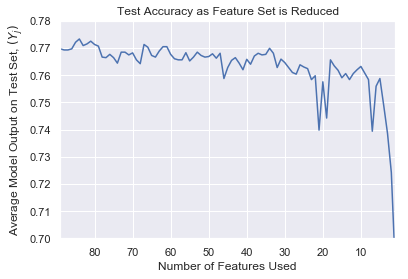

In [84]:
import matplotlib.pyplot as plt
#plt.plot(np.arange(89,0,-1), np.mean(model_outputs_acc_train,axis=1)) 
plt.plot(np.arange(89,0,-1), np.mean(model_outputs_acc_test,axis=1)) 
plt.xlabel('Number of Features Used') 
# frequency label 
plt.ylabel('Average Model Output on Test Set, ' + r'$(Y_j)$')
plt.axis([89,1,0.70,0.78])
# plot title 
plt.title('Test Accuracy as Feature Set is Reduced')
plt.show()

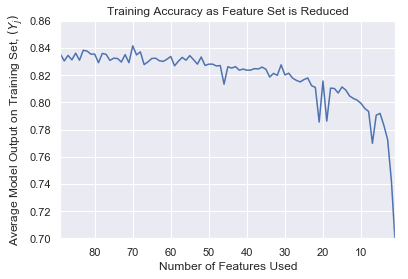

In [85]:
import matplotlib.pyplot as plt
#plt.plot(np.arange(89,0,-1), np.mean(model_outputs_acc_train,axis=1)) 
plt.plot(np.arange(89,0,-1), np.mean(model_outputs_acc_train,axis=1)) 
plt.xlabel('Number of Features Used') 
# frequency label 
plt.ylabel('Average Model Output on Training Set, ' + r'$(Y_j)$')
plt.axis([89,1,0.70,0.86])
# plot title 
plt.title('Training Accuracy as Feature Set is Reduced')
plt.show()

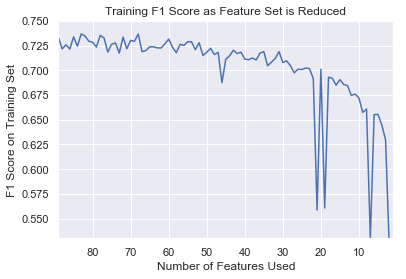

In [86]:
import matplotlib.pyplot as plt
#plt.plot(np.arange(89,0,-1), np.mean(model_outputs_acc_train,axis=1)) 
plt.plot(np.arange(89,0,-1), np.mean(model_outputs_F1_train,axis=1)) 
plt.xlabel('Number of Features Used') 
# frequency label 
plt.ylabel('F1 Score on Training Set')
plt.axis([89,1,0.53,0.75])
# plot title 
plt.title('Training F1 Score as Feature Set is Reduced')
plt.show()

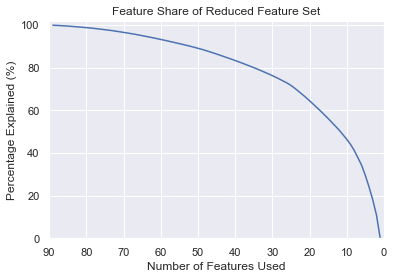

In [87]:
import matplotlib.pyplot as plt
#plt.plot(np.arange(89,0,-1), np.mean(model_outputs_acc_train,axis=1)) 
plt.plot(np.arange(89,0,-1), 100*(1-np.cumsum(shap_population_summary[shap_population_rank][::-1]/np.sum(shap_population_summary)))) 
plt.xlabel('Number of Features Used') 
# frequency label 
plt.ylabel('Percentage Explained (%)')
plt.axis([90,0,-0.02,102])
# plot title 
plt.title('Feature Share of Reduced Feature Set')
plt.show()

In [ ]:
feature_share = 0
for i in range(24):
    feature_share += shap_population_summary[shap_population_rank][i]/np.sum(shap_population_summary)
print(feature_share*100)

#### Get final reduced dataset

In [ ]:
features_reduced = shap_population_rank[:24]

In [ ]:
# Feature names of reduced feature set
#features_chosen[features_reduced]
# Aggregate SHAP values of reduced feature set
#shap_population_summary[features_reduced}

In [ ]:
import dill
dill.dump_session('notebook_env.db')

#dill.load_session('notebook_env.db')